In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


pd.pandas.set_option('display.max_columns', None)

In [279]:
data= pd.read_csv(r'/Users/saurabhverma/Downloads/train.csv')

In [5]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [6]:
data.shape

(1460, 81)

Exploring the target variable

In [8]:
data.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

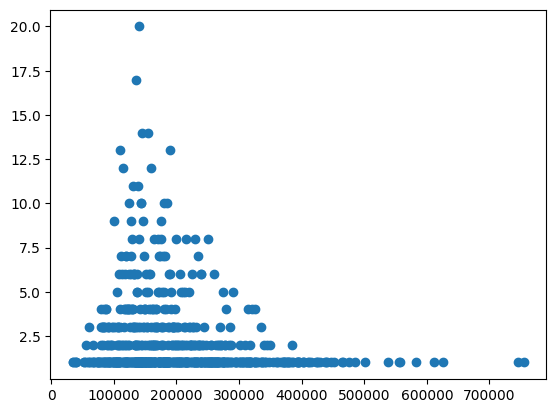

In [15]:
plt.scatter(data.SalePrice.value_counts().index,data.SalePrice.value_counts())

[Text(0.5, 1.0, 'House Prices'),
 Text(0.5, 0, 'Prices'),
 Text(0, 0.5, 'Number')]

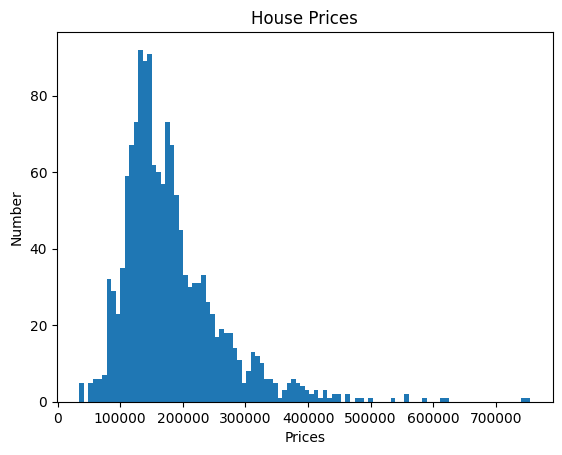

In [30]:
fig= plt.figure()
ax= fig.add_subplot(1,1,1)
ax.hist(data.SalePrice, bins=100 )

props= {'title': 'House Prices',
        'xlabel': 'Prices',
        'ylabel': 'Number'}

ax.set(**props)

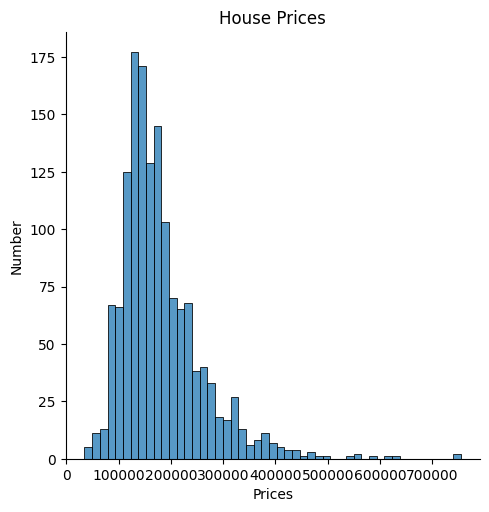

In [32]:
ax= sns.displot(data.SalePrice)
props= {'title': 'House Prices',
        'xlabel': 'Prices',
        'ylabel': 'Number'}

ax.set(**props)


The distribuition is skewed towards the right. We can improve the value spread mathematically. LEts try log.

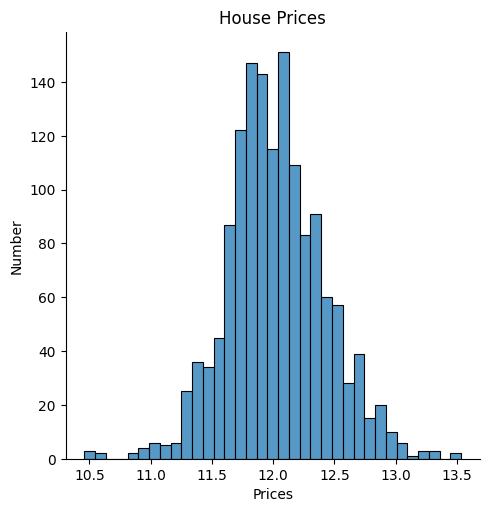

In [34]:
ax= sns.displot(np.log(data.SalePrice))
props= {'title': 'House Prices',
        'xlabel': 'Prices',
        'ylabel': 'Number'}

ax.set(**props)

In [67]:
numerical_columns= list(data.select_dtypes(['int', 'float']).columns)
numerical_columns.remove('MSSubClass')
numerical_columns.remove('SalePrice')
numerical_columns

['Id',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [64]:
categorical_columns= (list(data.select_dtypes(['object', 'O']).columns)+ ['MSSubClass'])
categorical_columns

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'MSSubClass']

Looping method

In [68]:
categorical_cols= [var for var in data.columns if data[var].dtype == 'object']
categorical_cols.append('MSSubClass')
categorical_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'MSSubClass']

In [72]:
numerical_cols= [var for var in data.columns if data[var].dtype in ('int', 'float')]
numerical_cols.remove('MSSubClass')
numerical_cols.remove('SalePrice')
numerical_cols

['Id',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

Above we used 2 different methods

Checking for missing data

In [80]:
100.0*data.isnull().sum().sort_values(ascending=False)/data.shape[0]

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
MasVnrType     59.726027
                 ...    
ExterQual       0.000000
Exterior2nd     0.000000
Exterior1st     0.000000
RoofMatl        0.000000
SalePrice       0.000000
Length: 81, dtype: float64

In [84]:
vars_with_null= [vars for vars in data.columns if data[vars].isnull().sum() > 0]


data[vars_with_null].isnull().mean().sort_values(ascending= False) #interesting how mean is getting applied to get the percentage

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
Electrical      0.000685
dtype: float64

NUmerical variables:

Dicrete
Continuous
Distributions
Transformation

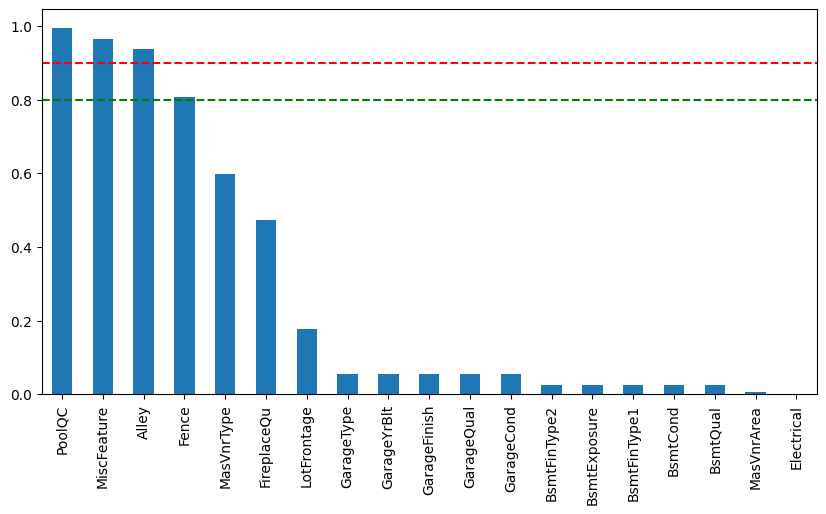

In [91]:
data[vars_with_null].isnull().mean().sort_values(ascending= False).plot.bar(figsize= (10,5))
plt.axhline(y=0.9, color= 'r', linestyle= '--')
plt.axhline(y=0.8, color= 'g', linestyle= '--')

In [97]:
categorical_na= data[vars_with_null].select_dtypes(['object', 'O']).columns
numerical_na= data[vars_with_null].select_dtypes(['int', 'float']).columns

categorical_na

Index(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature'],
      dtype='object')

In [98]:
numerical_na

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

Relationship between null columns and SalePrice

In [101]:
def get_rlation_of_null_values(df, var):

    df=df.copy()


    df[var] = np.where(df[var].isnull(), 1,0)


    tmp= df.groupby(var)['SalePrice'].agg(['mean', 'std'])

    tmp.plot(kind= 'barh', y= 'mean', xerr= 'std', title= 'Sale Price', color= 'green', legend= False)



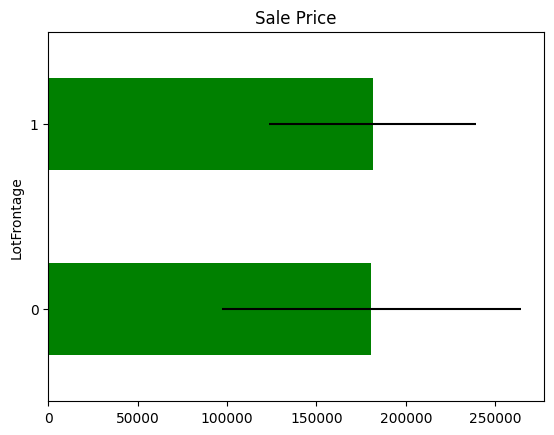

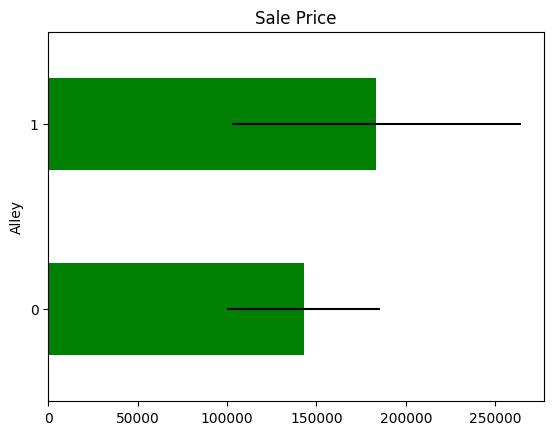

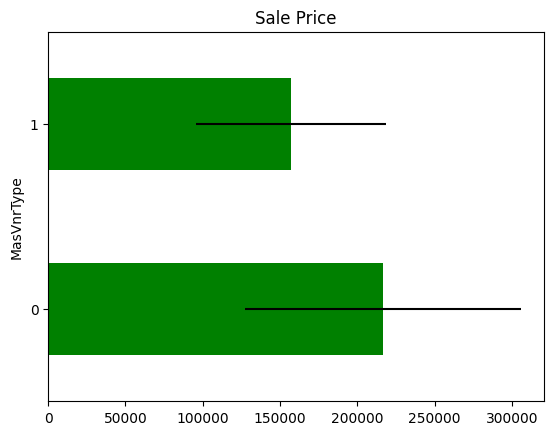

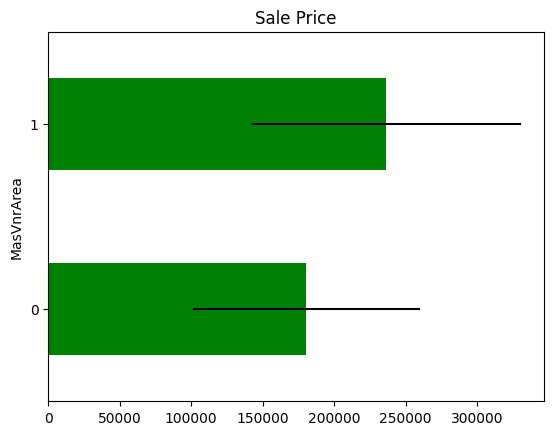

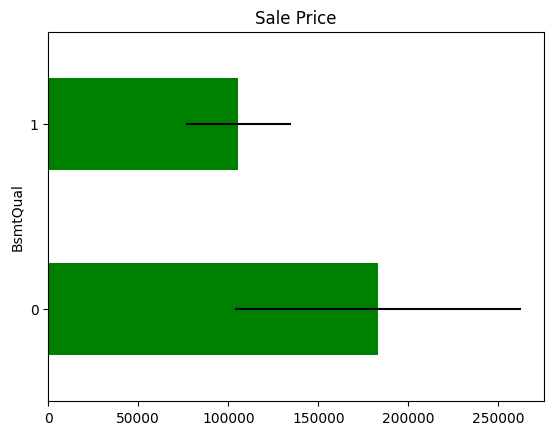

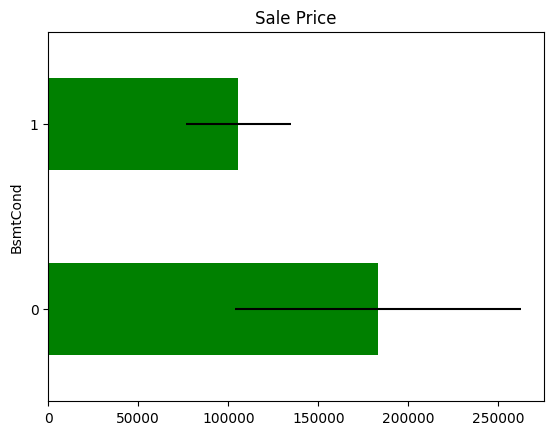

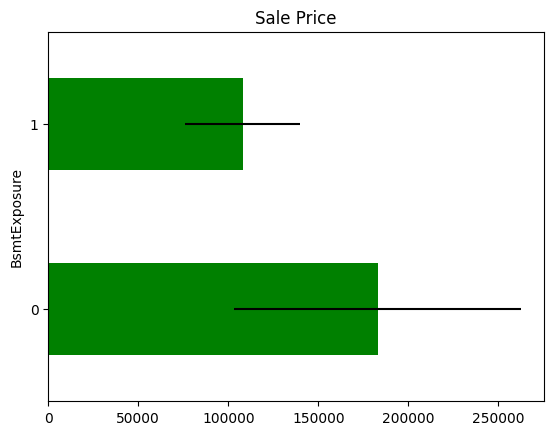

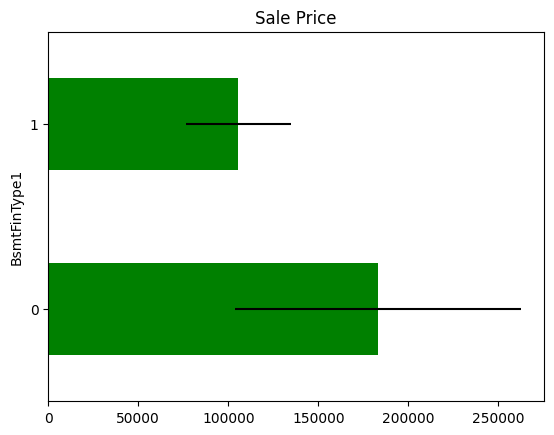

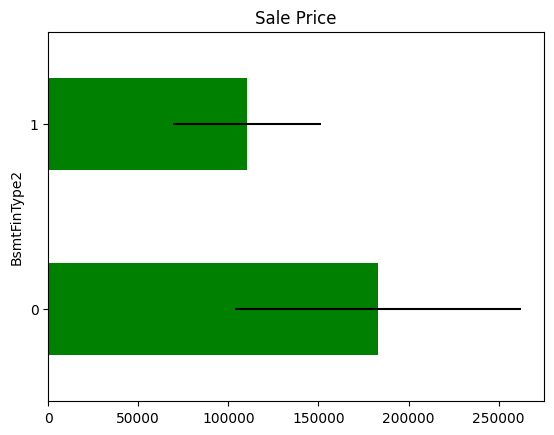

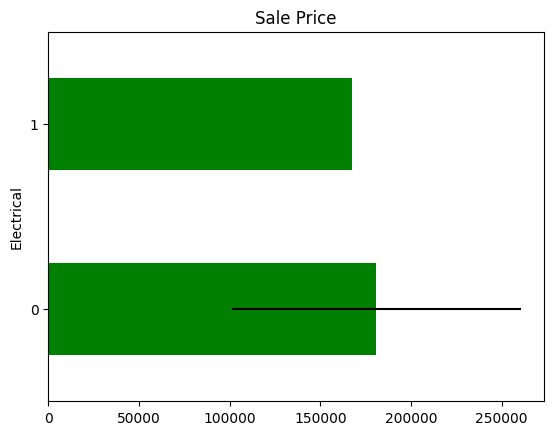

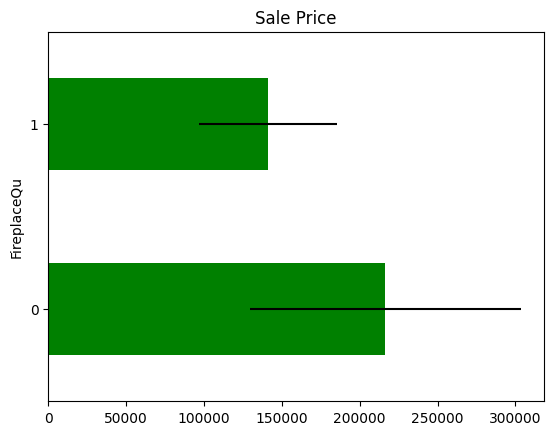

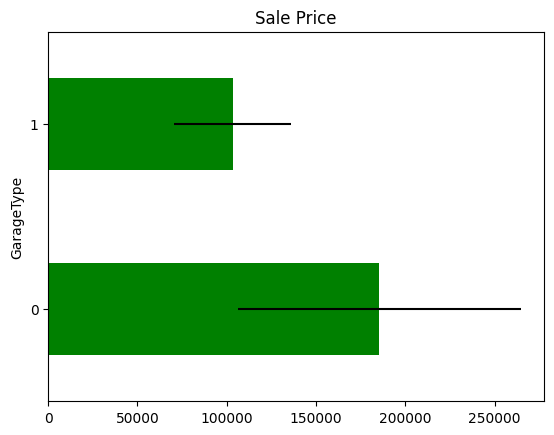

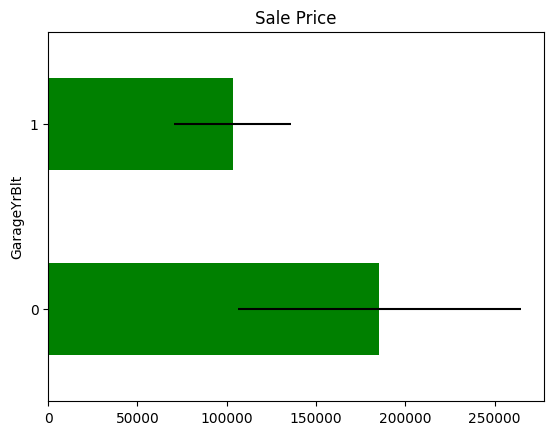

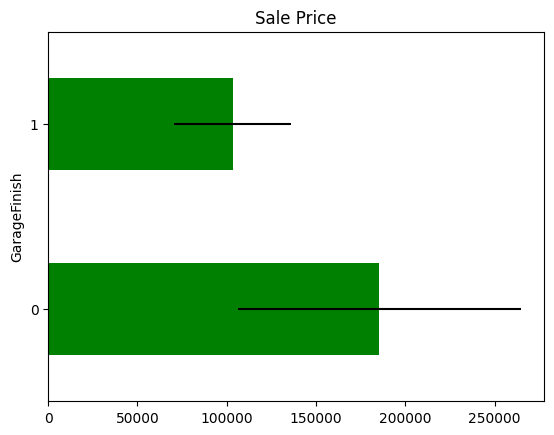

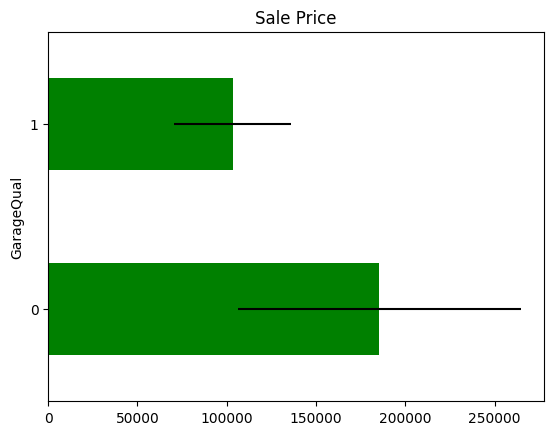

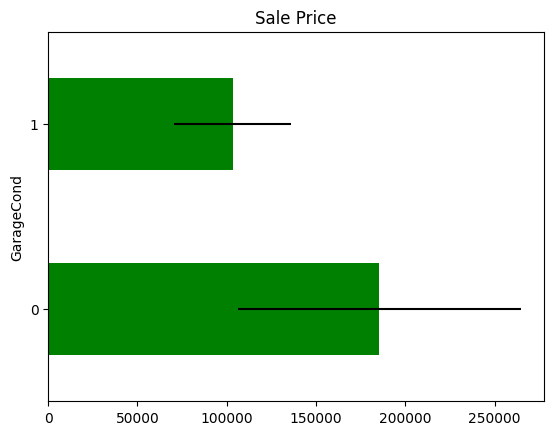

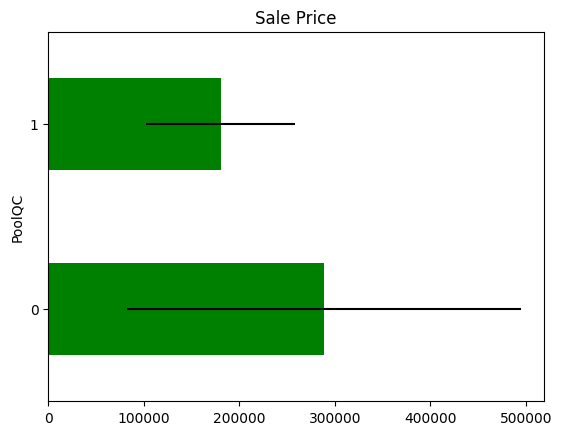

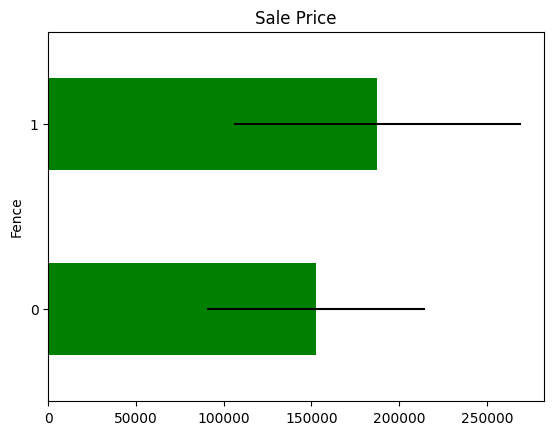

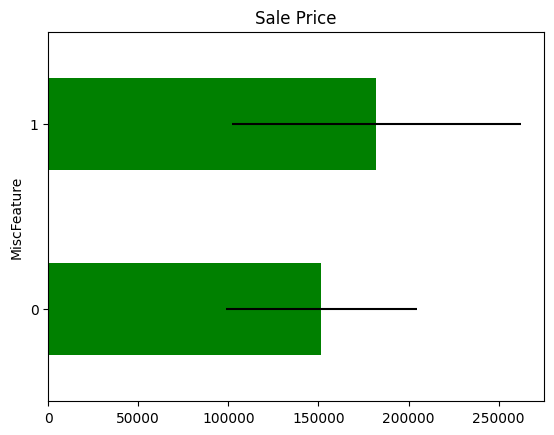

In [102]:
for var in vars_with_null:
    get_rlation_of_null_values(data, var)

Numerical data analysis

In [108]:
print('Numerical Columns: ' ,len(numerical_columns))

Numerical Columns:  36


In [110]:
data[numerical_columns].head()

Id  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1         65.0     8450            7            5       2003   
1   2         80.0     9600            6            8       1976   
2   3         68.0    11250            7            5       2001   
3   4         60.0     9550            7            5       1915   
4   5         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  
0              0          0            0         0        0       2    2008  
1              0          0            0         0        0       5    2007  
2              0          0            0         0        0       9    2008  
3            272          0            0         0        0       2    2006  
4              0          0            0         0        0      12    2008

In [114]:
data.columns[data.columns.str.contains('Yr|Year')]

Index(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold'], dtype='object')

In [126]:
years_var= [var for var in numerical_columns if 'Yr'  in var or 'Year' in var]
years_var

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [135]:
for var in years_var:
    print(var,data[var].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

In [138]:
def build_plot(data, var):
    data.groupby(var)['SalePrice'].median().plot()
    plt.ylabel('Median House Price')
    plt.show()

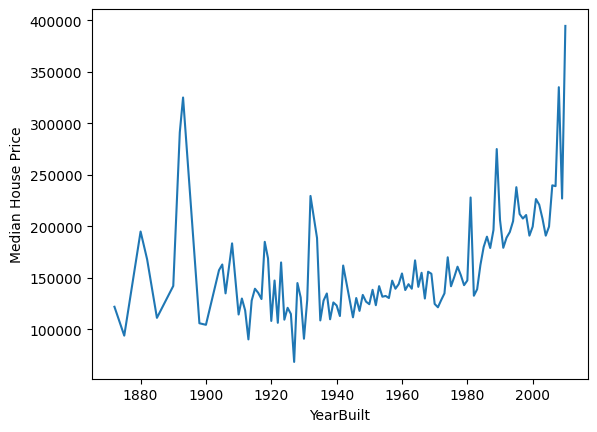

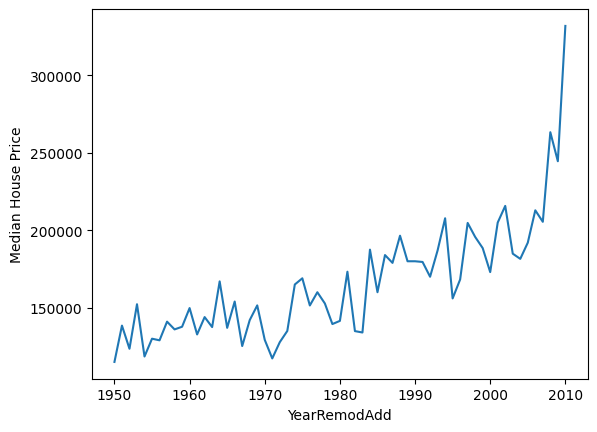

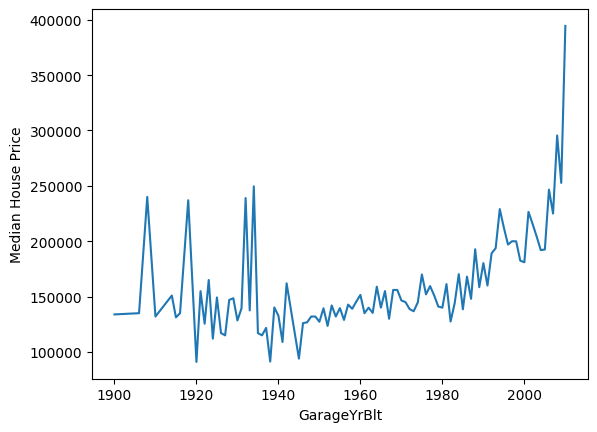

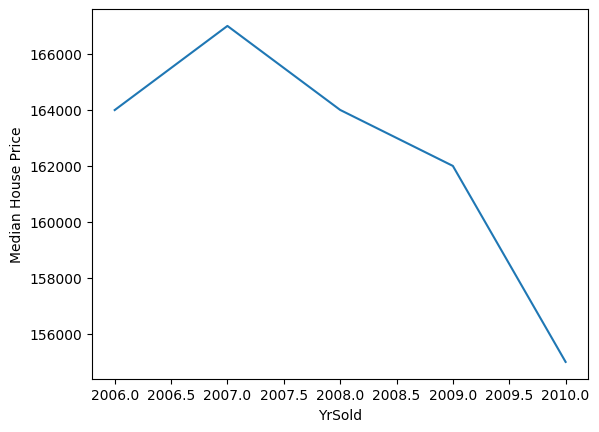

In [139]:
for var in years_var:
    build_plot(data,var)
    

As time passes the sell price has dropped, one thing that could explain is that recently older hpuses have bee sold more

In [146]:
def plot_chart_tenure_vs_year(data, var):
    data=data.copy()
    
    data[var]= data['YrSold'] - data[var]

    data.groupby('YrSold')[var].median().plot()
    plt.ylabel('Time elapsed from'+var)
    plt.show()


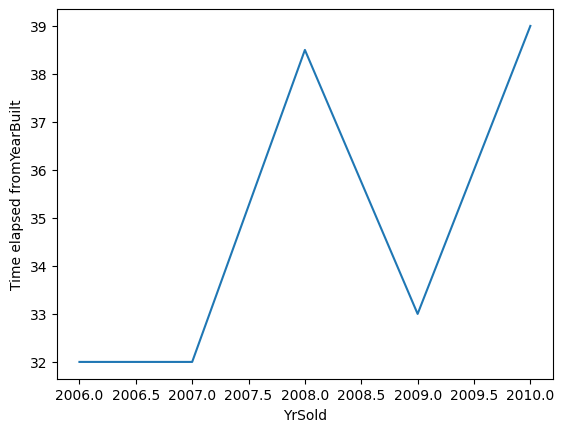

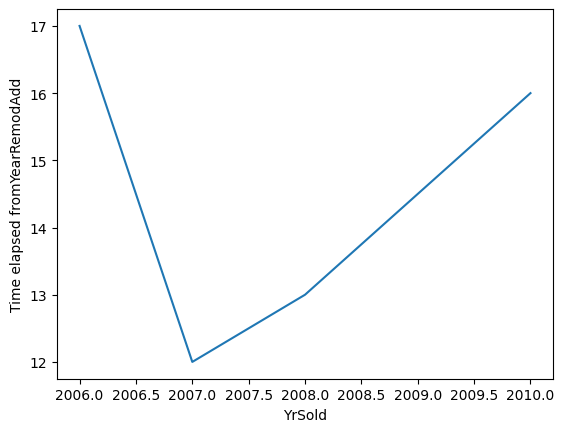

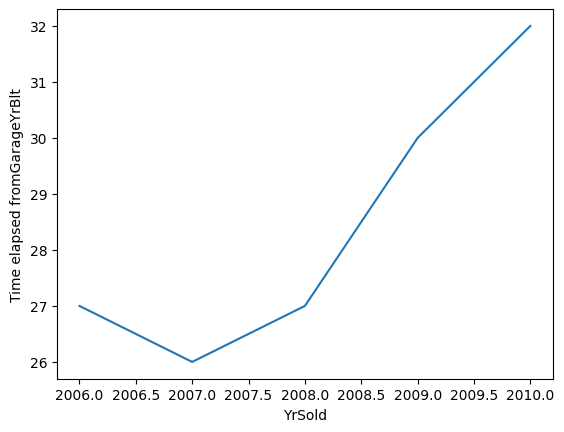

In [147]:
for var in years_var:
    if var!= 'YrSold':
        plot_chart_tenure_vs_year(data, var)

In [150]:
def scateer_plot(data, var):
    data=data.copy()
    
    data[var]= data['YrSold'] - data[var]

    plt.scatter(x= data[var], y= data['SalePrice'] )
    plt.xlabel('Time elapsed from '+var)
    plt.show()


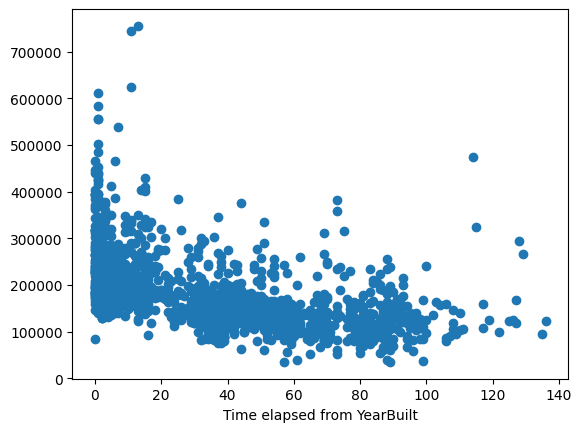

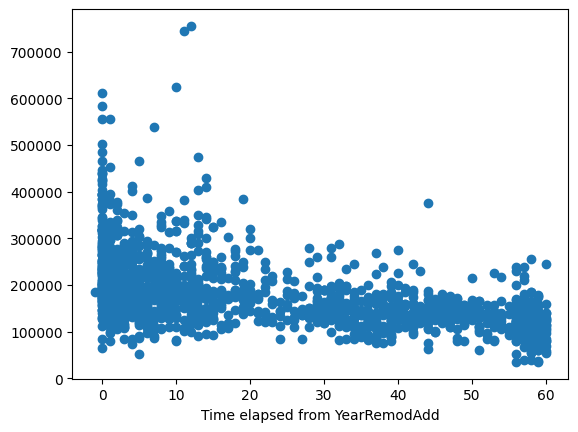

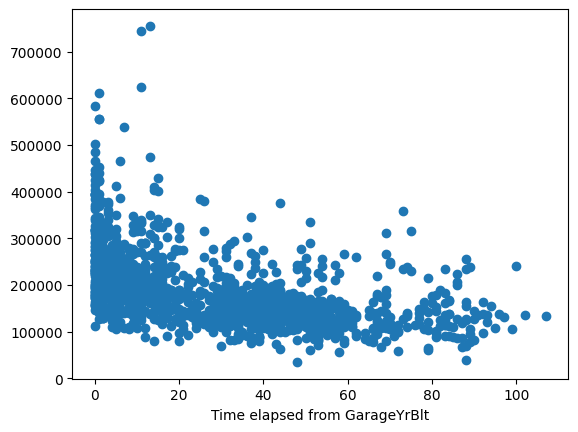

In [151]:
for var in years_var:
    if var!= 'YrSold':
        scateer_plot(data, var)

Checking for discrete variables

In [158]:
discrete_variables =[var for var in numerical_columns if len(data[var].unique()) < 20 and var not in years_var]

In [160]:
data[discrete_variables]

OverallQual  OverallCond  BsmtFullBath  BsmtHalfBath  FullBath  \
0               7            5             1             0         2   
1               6            8             0             1         2   
2               7            5             1             0         2   
3               7            5             1             0         1   
4               8            5             1             0         2   
...           ...          ...           ...           ...       ...   
1455            6            5             0             0         2   
1456            6            6             1             0         2   
1457            7            9             0             0         2   
1458            5            6             1             0         1   
1459            5            6             1             0         1   

      HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0            1             3             1             8           0   
1            0             3             1             6           1   
2            1             3             1             6           1   
3            0             3             1             7           1   
4            1             4             1             9           1   
...        ...           ...           ...           ...         ...   
1455         1             3             1             7           1   
1456         0             3             1             7           2   
1457         0             4             1             9           2   
1458         0             2             1             5           0   
1459         1             3             1             6           0   

      GarageCars  PoolArea  MoSold  
0              2         0       2  
1              2         0       5  
2              2         0       9  
3              3         0       2  
4              3         0      12  
...          ...       ...     ...  
1455           2         0       8  
1456           2         0       2  
1457           1         0       5  
1458           1         0       4  
1459           1         0       6  

[1460 rows x 13 columns]

In [156]:
len(data['MasVnrArea'].unique())

328

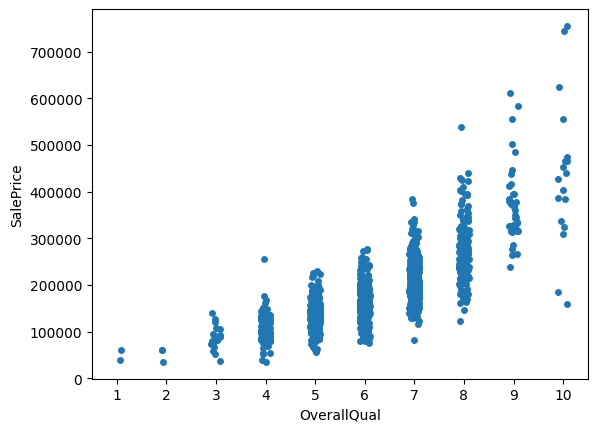

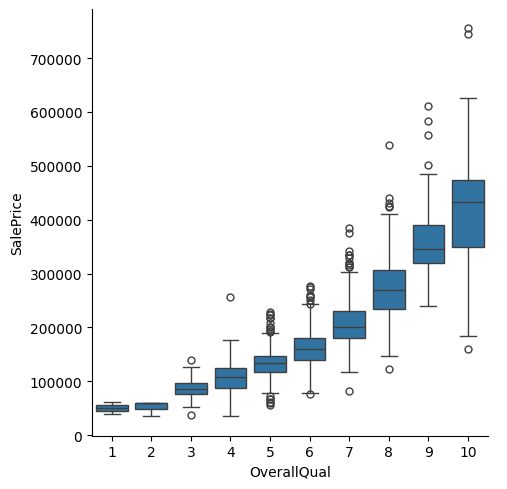

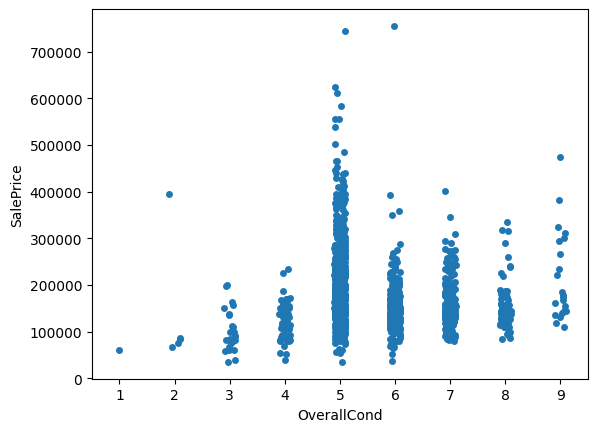

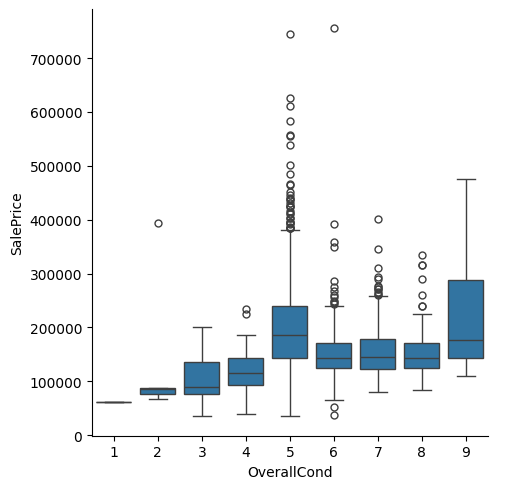

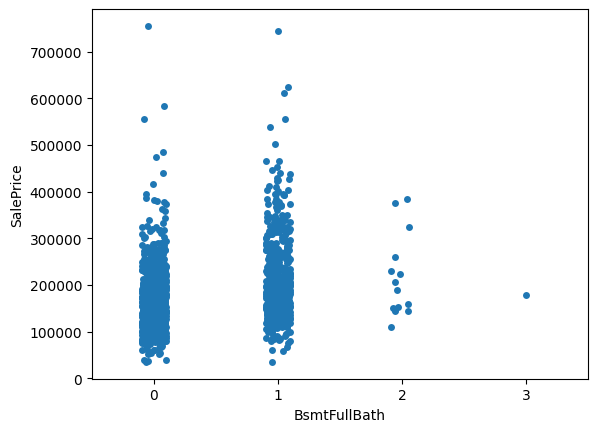

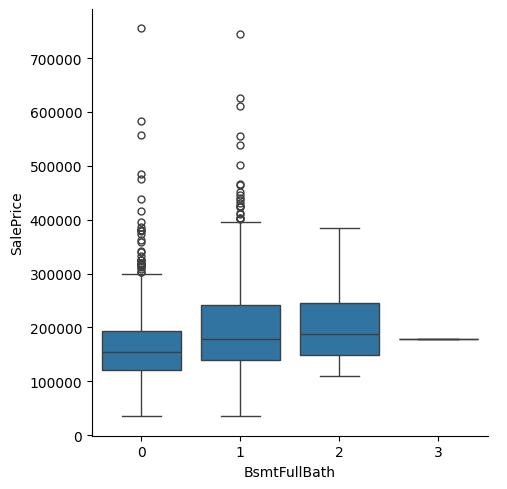

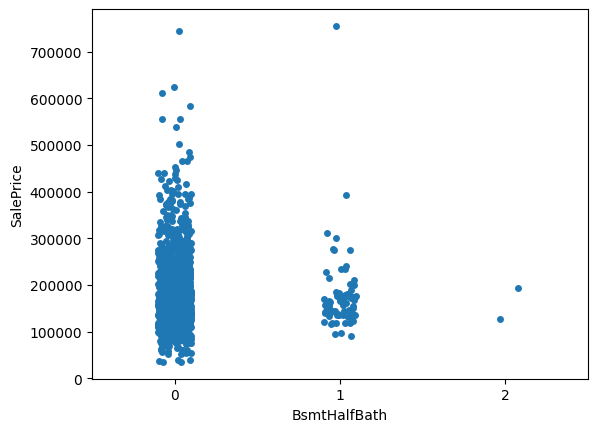

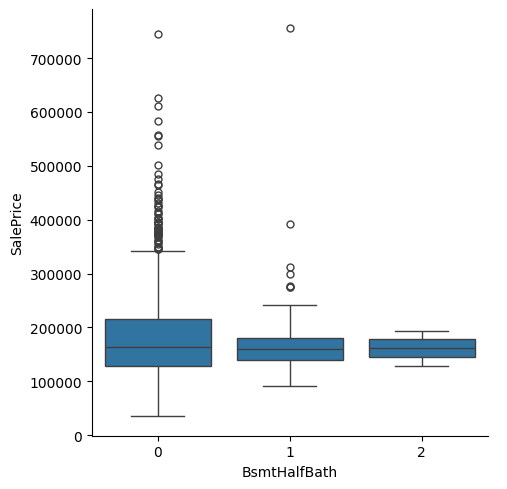

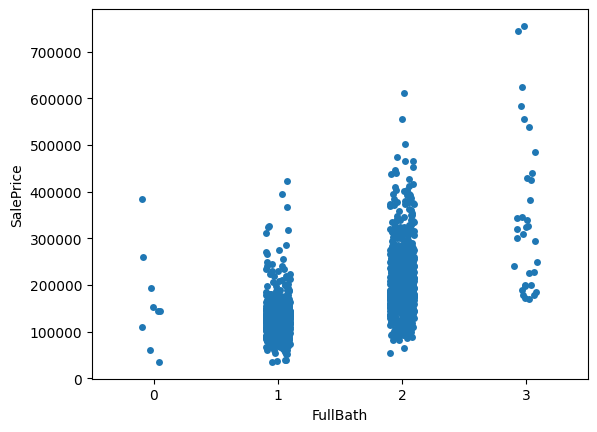

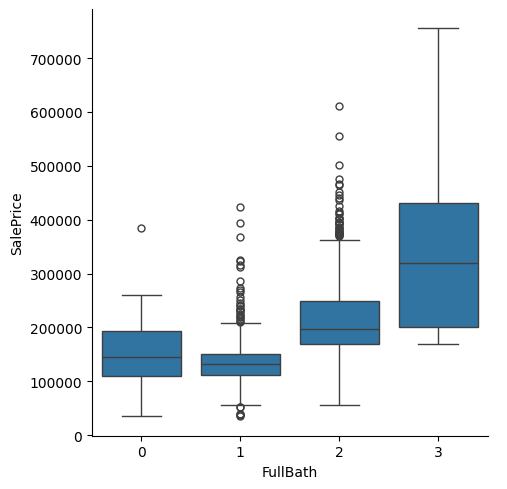

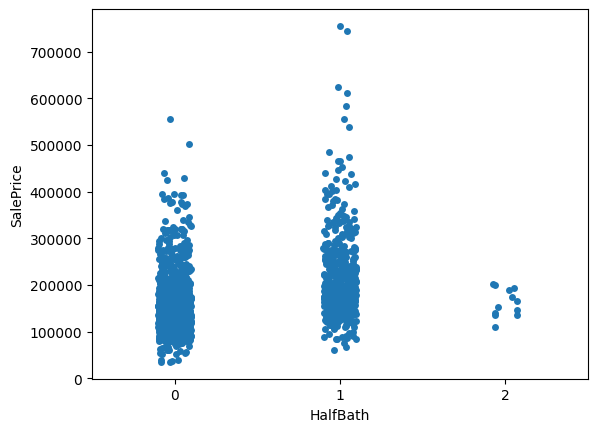

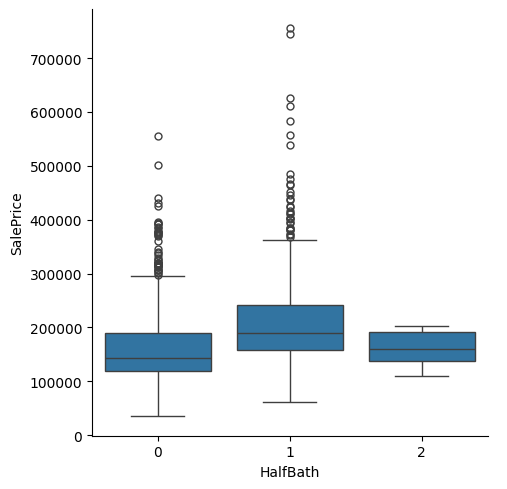

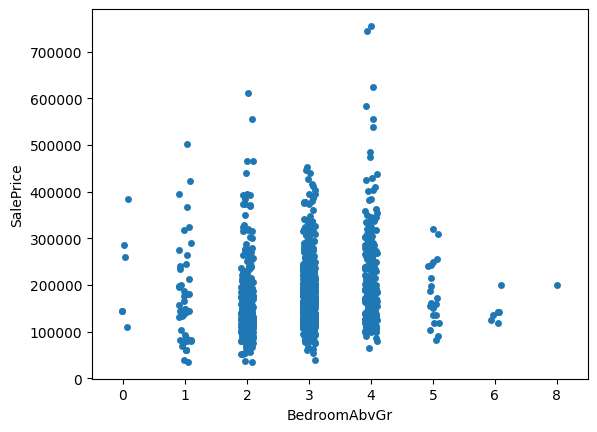

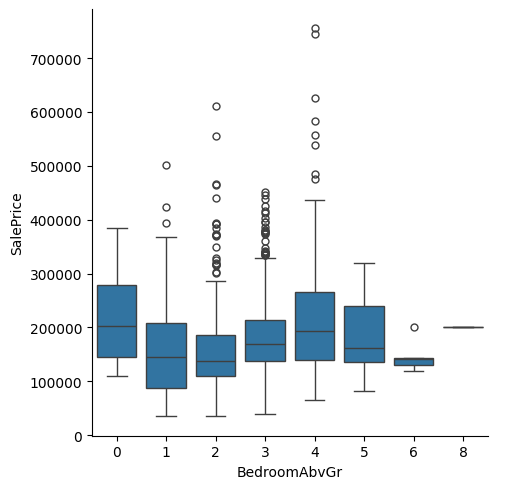

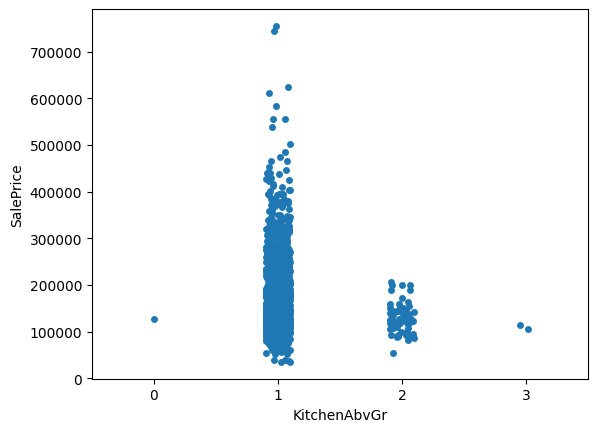

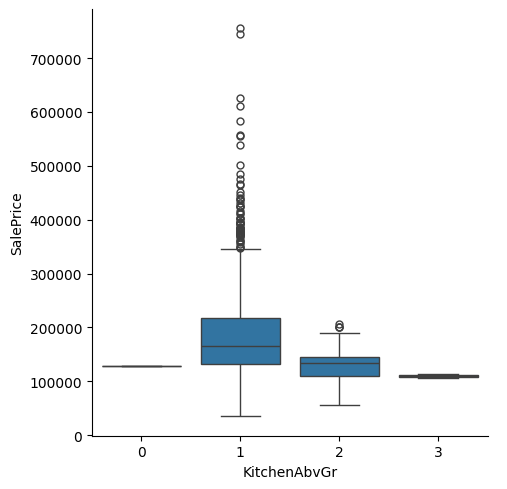

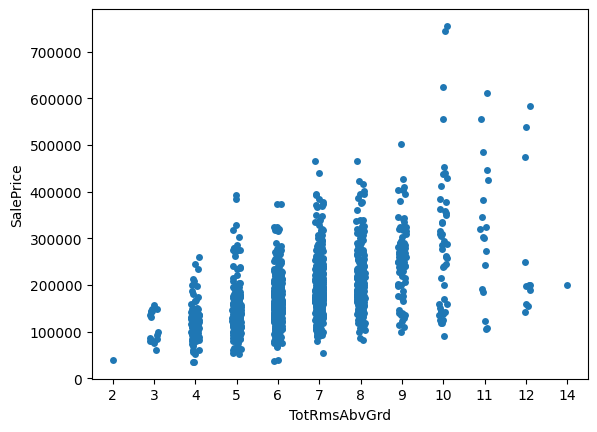

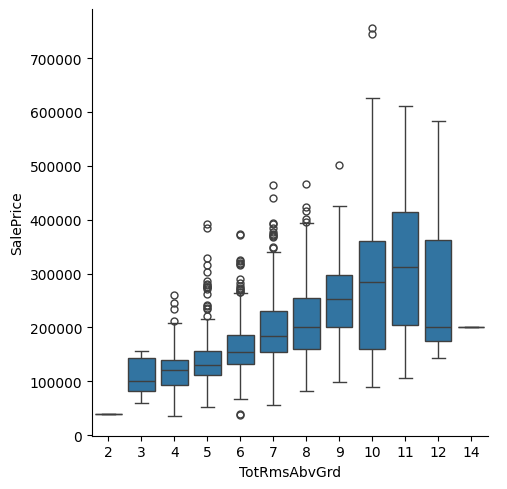

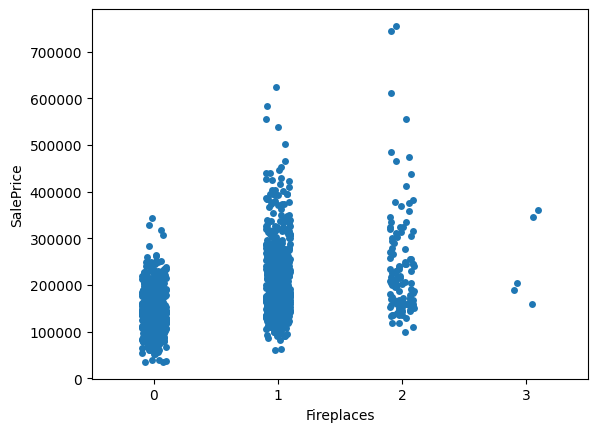

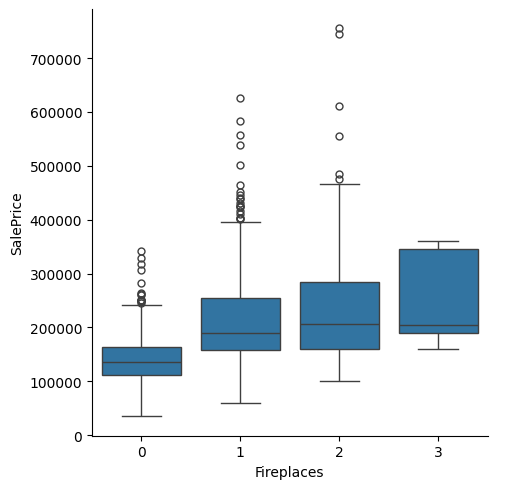

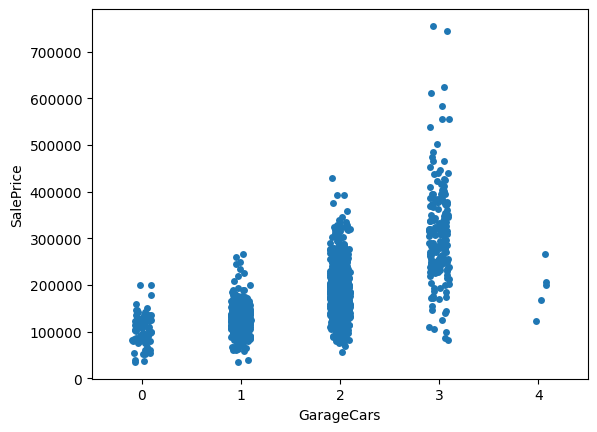

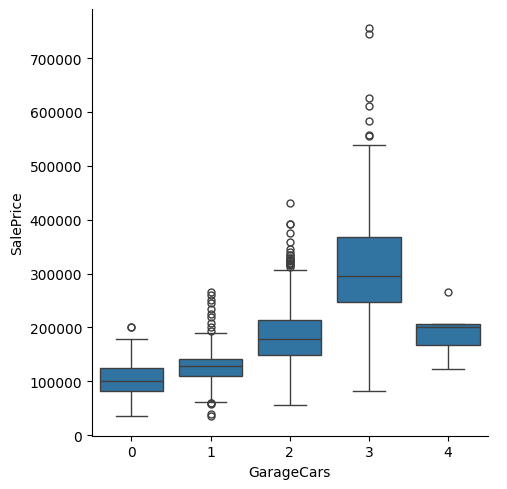

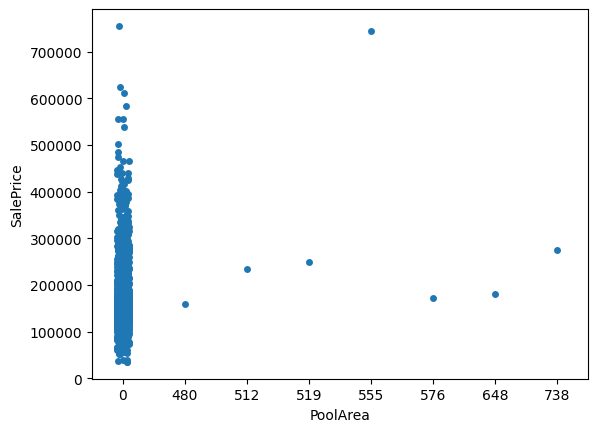

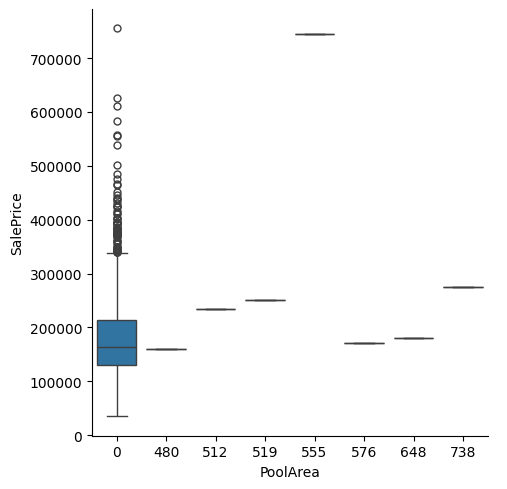

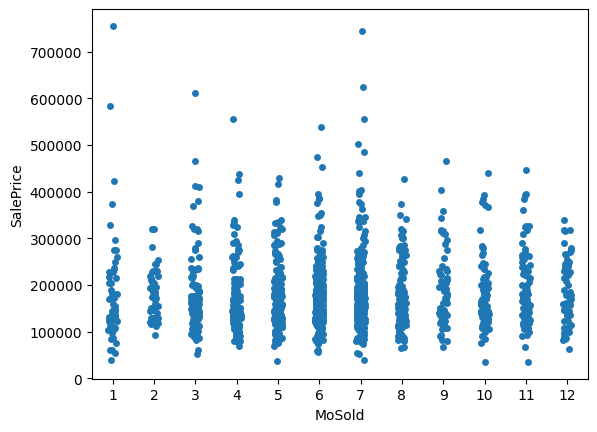

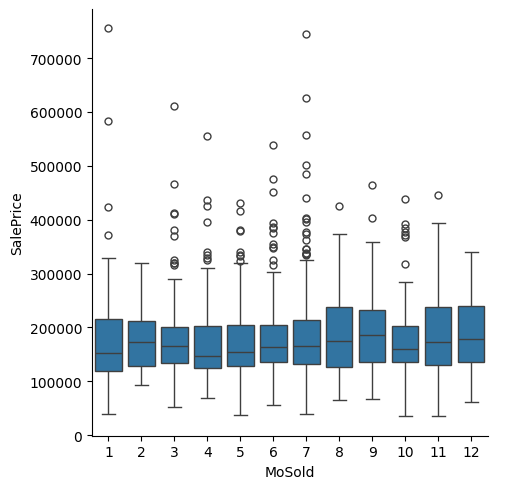

In [168]:
for var in discrete_variables:
    sns.stripplot(x=data[var],y=data['SalePrice'])
    sns.catplot(x=data[var],y=data['SalePrice'], kind='box')
    plt.show()

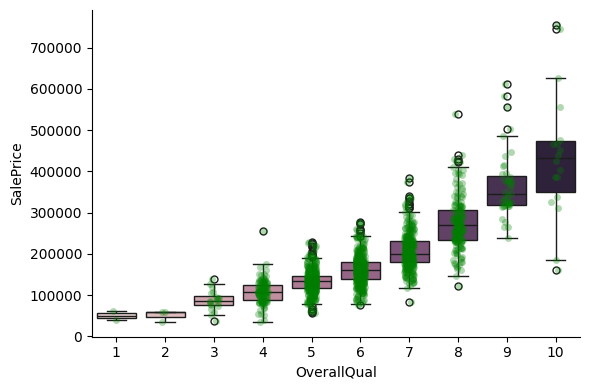

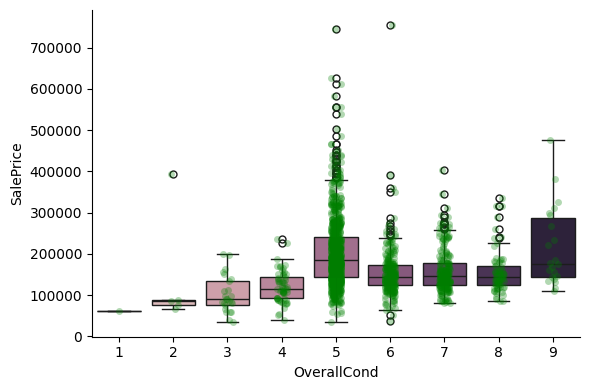

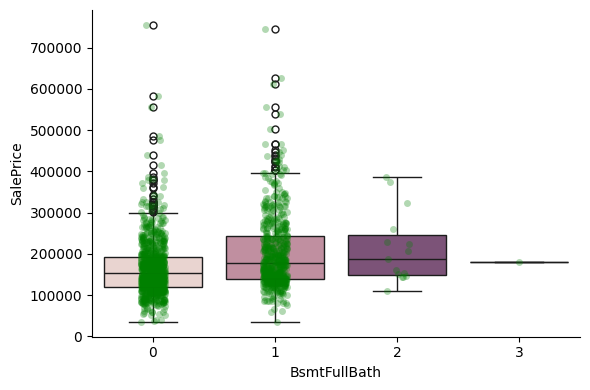

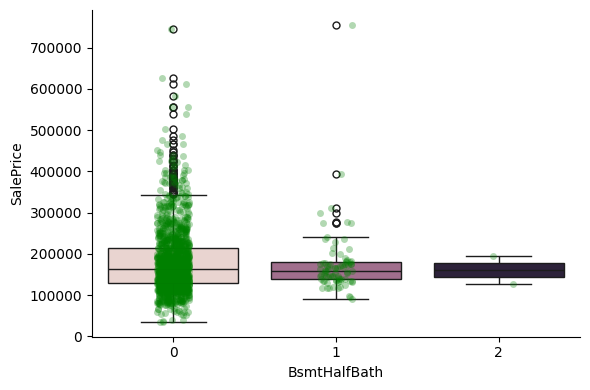

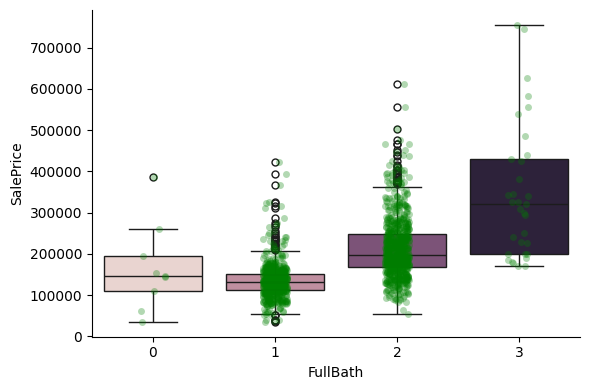

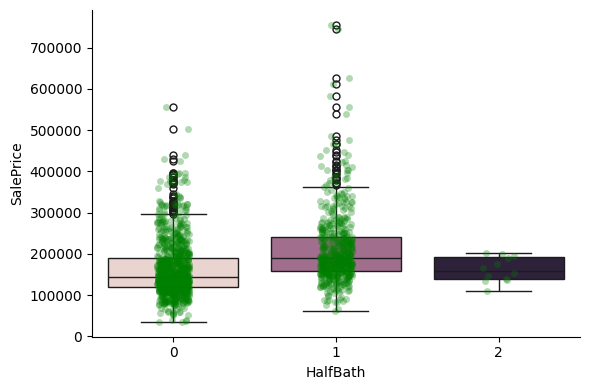

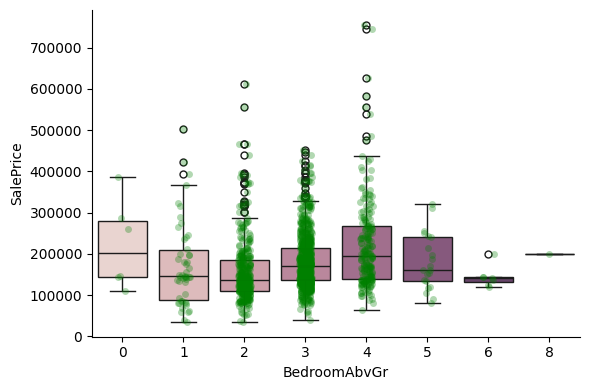

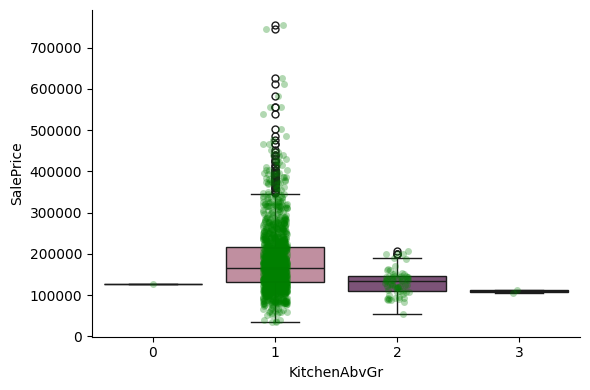

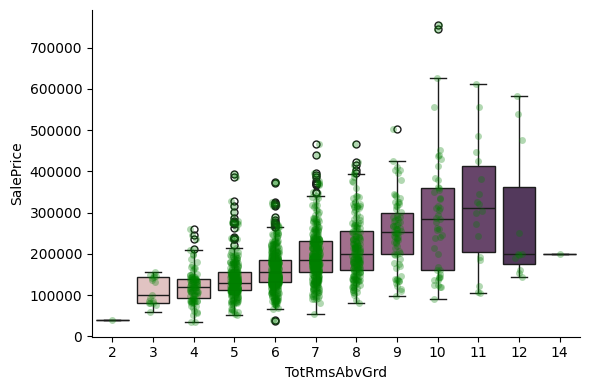

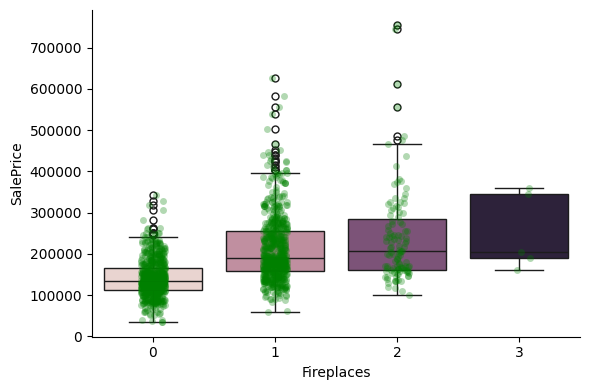

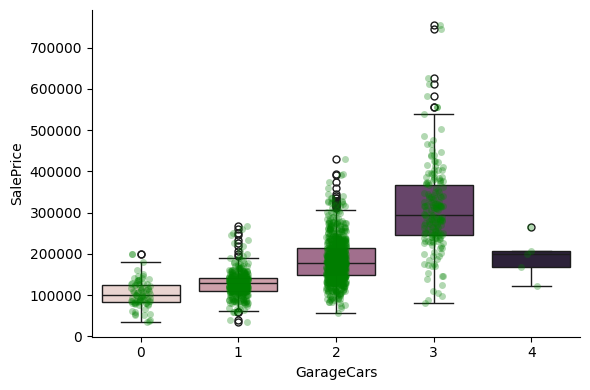

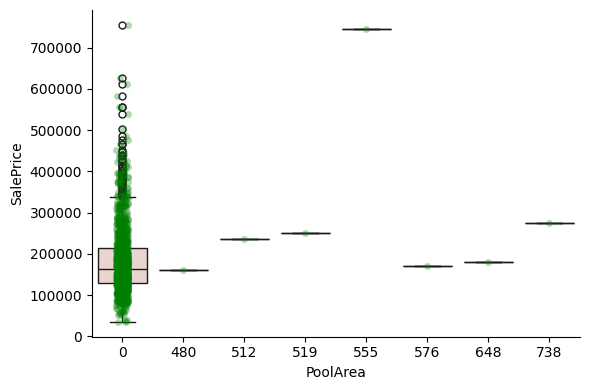

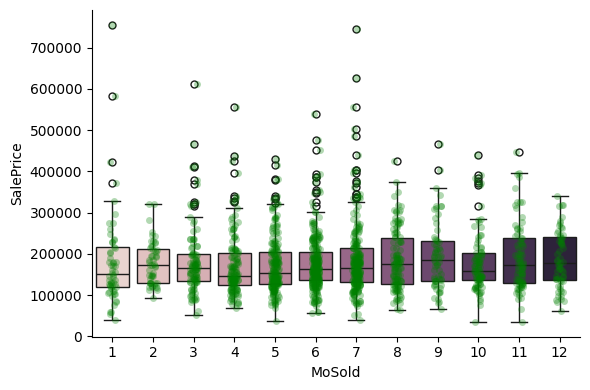

In [180]:
for var in discrete_variables:
    sns.catplot(x=var,y='SalePrice', data= data, kind='box', aspect=1.5, height=4, hue=var, legend=False)
    sns.stripplot(x=var,y='SalePrice', data= data, color= 'g', jitter=.1, alpha=.3)
    plt.show()  # overlaps in this sequence

In most of the above categories, prices changes as categories changes. These are useful categories in predicting the perice. Others are not.

Continuous variable

In [181]:
continuous_variables= [var for var in numerical_columns if var not in discrete_variables and var not in years_var]

In [182]:
continuous_variables

['Id',
 'LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal']

In [184]:
continuous_variables.remove('Id')

<Figure size 1000x1000 with 0 Axes>

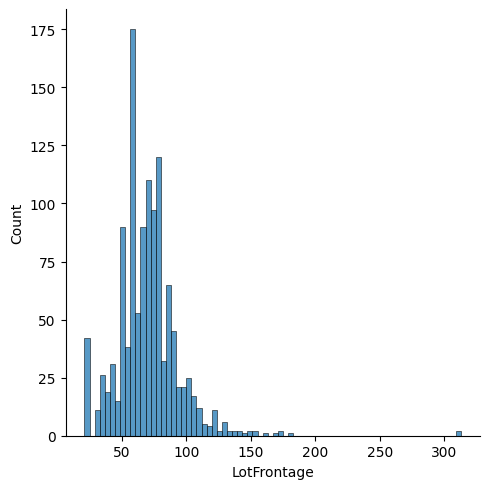

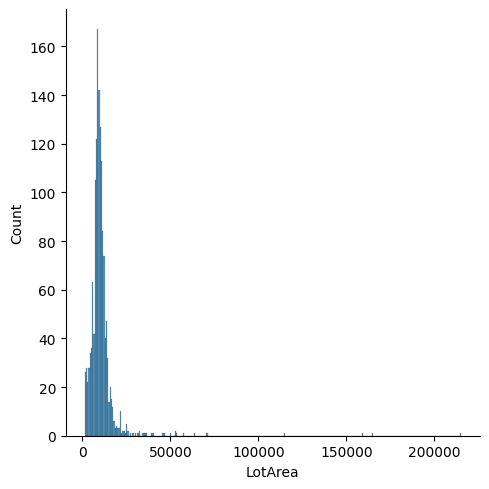

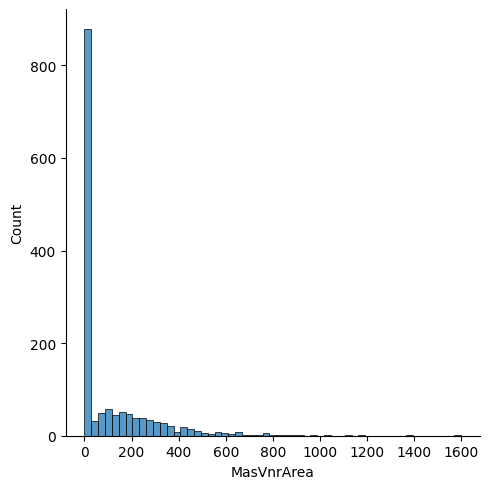

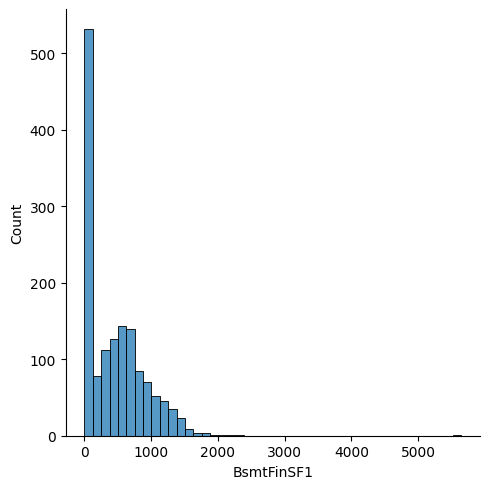

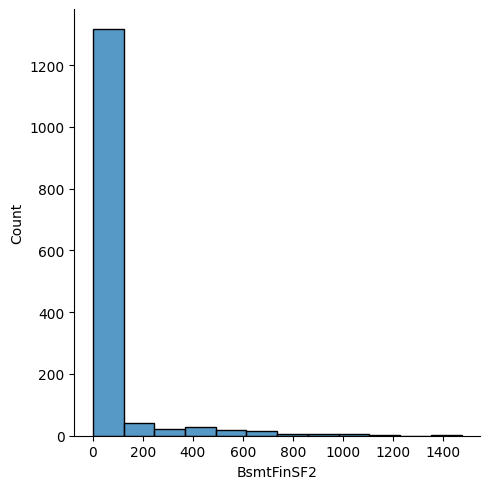

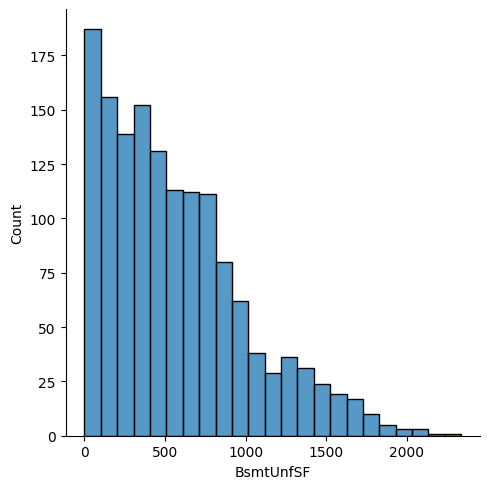

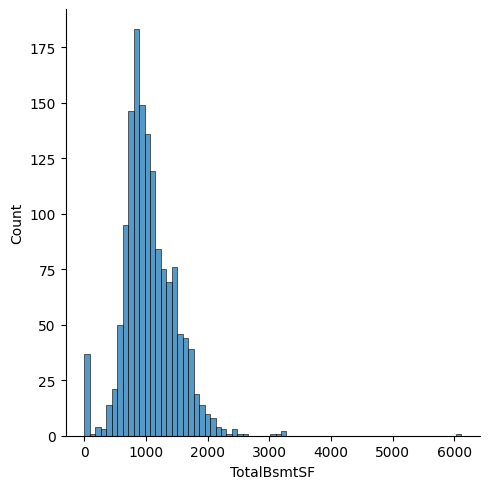

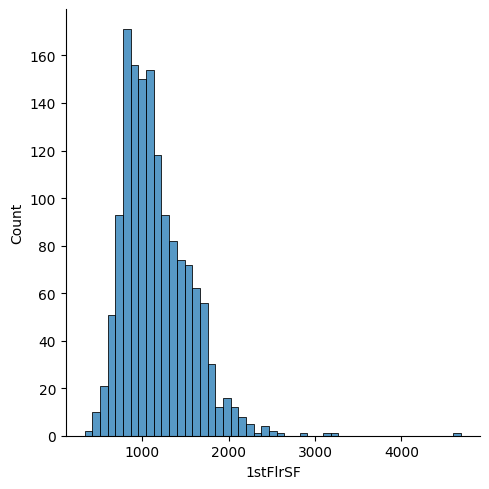

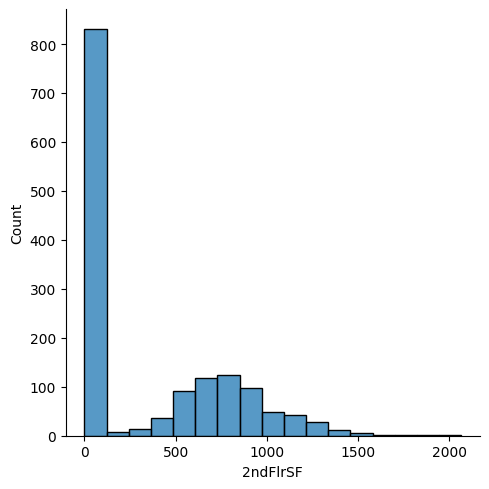

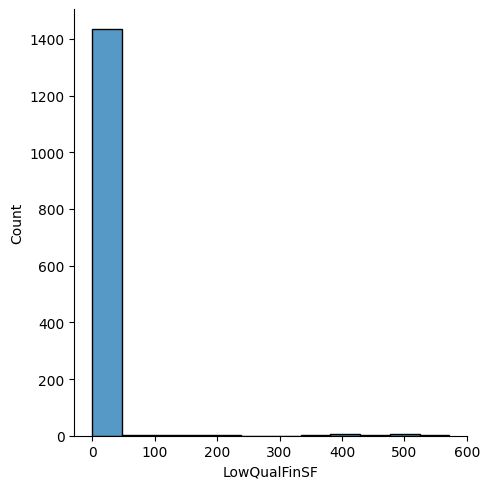

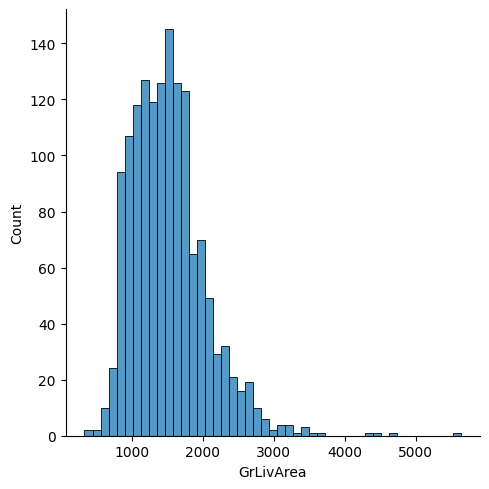

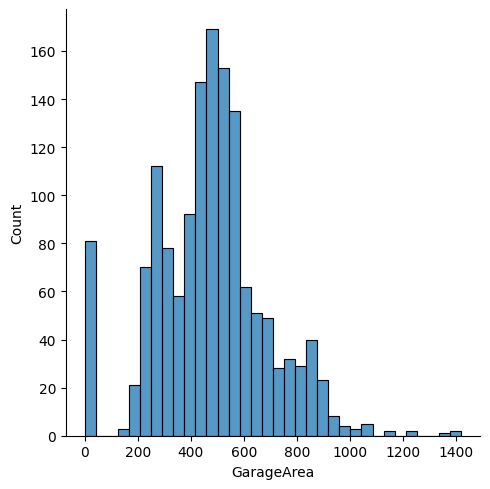

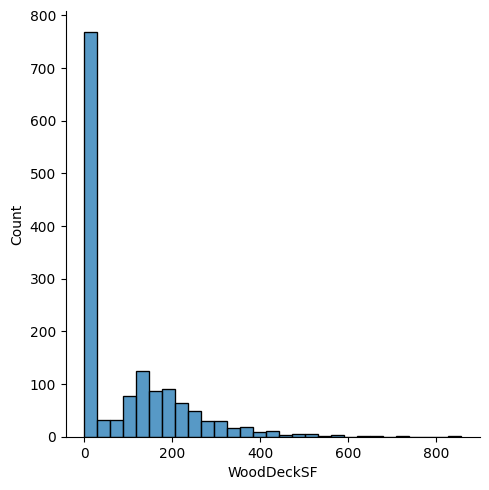

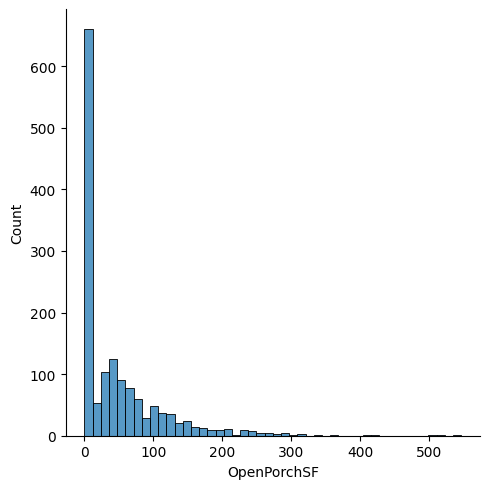

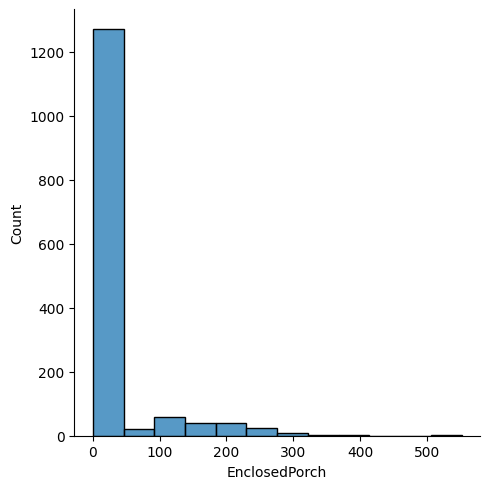

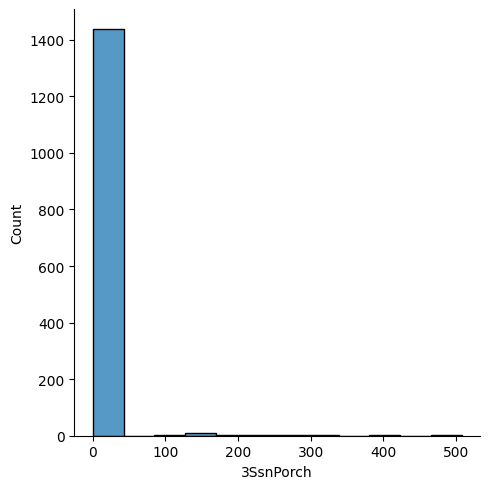

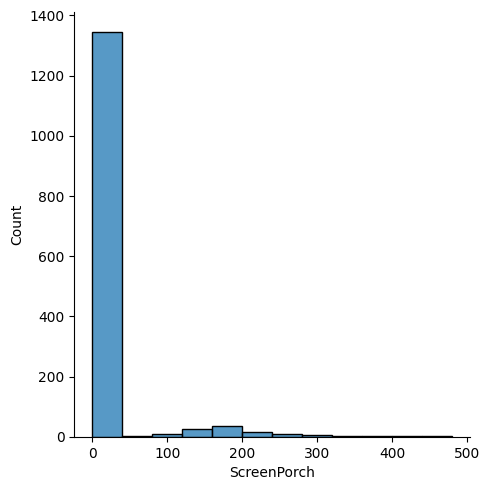

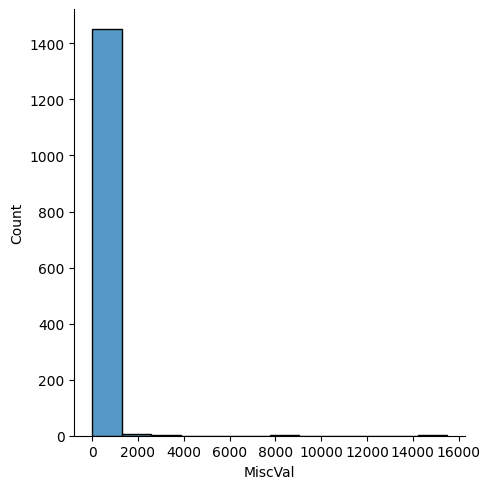

In [201]:
fig=plt.figure(figsize=(10,10))
for var in continuous_variables:
    sns.displot(data[var])

array([[<Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>],
       [<Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>],
       [<Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'GarageArea'}>],
       [<Axes: title={'center': 'WoodDeckSF'}>,
        <Axes: title={'center': 'OpenPorchSF'}>,
        <Axes: title={'center': 'EnclosedPorch'}>,
        <Axes: title={'center': '3SsnPorch'}>],
       [<Axes: title={'center': 'ScreenPorch'}>,
        <Axes: title={'center': 'MiscVal'}>, <Axes: >, <Axes: >]],
      dtype=object)

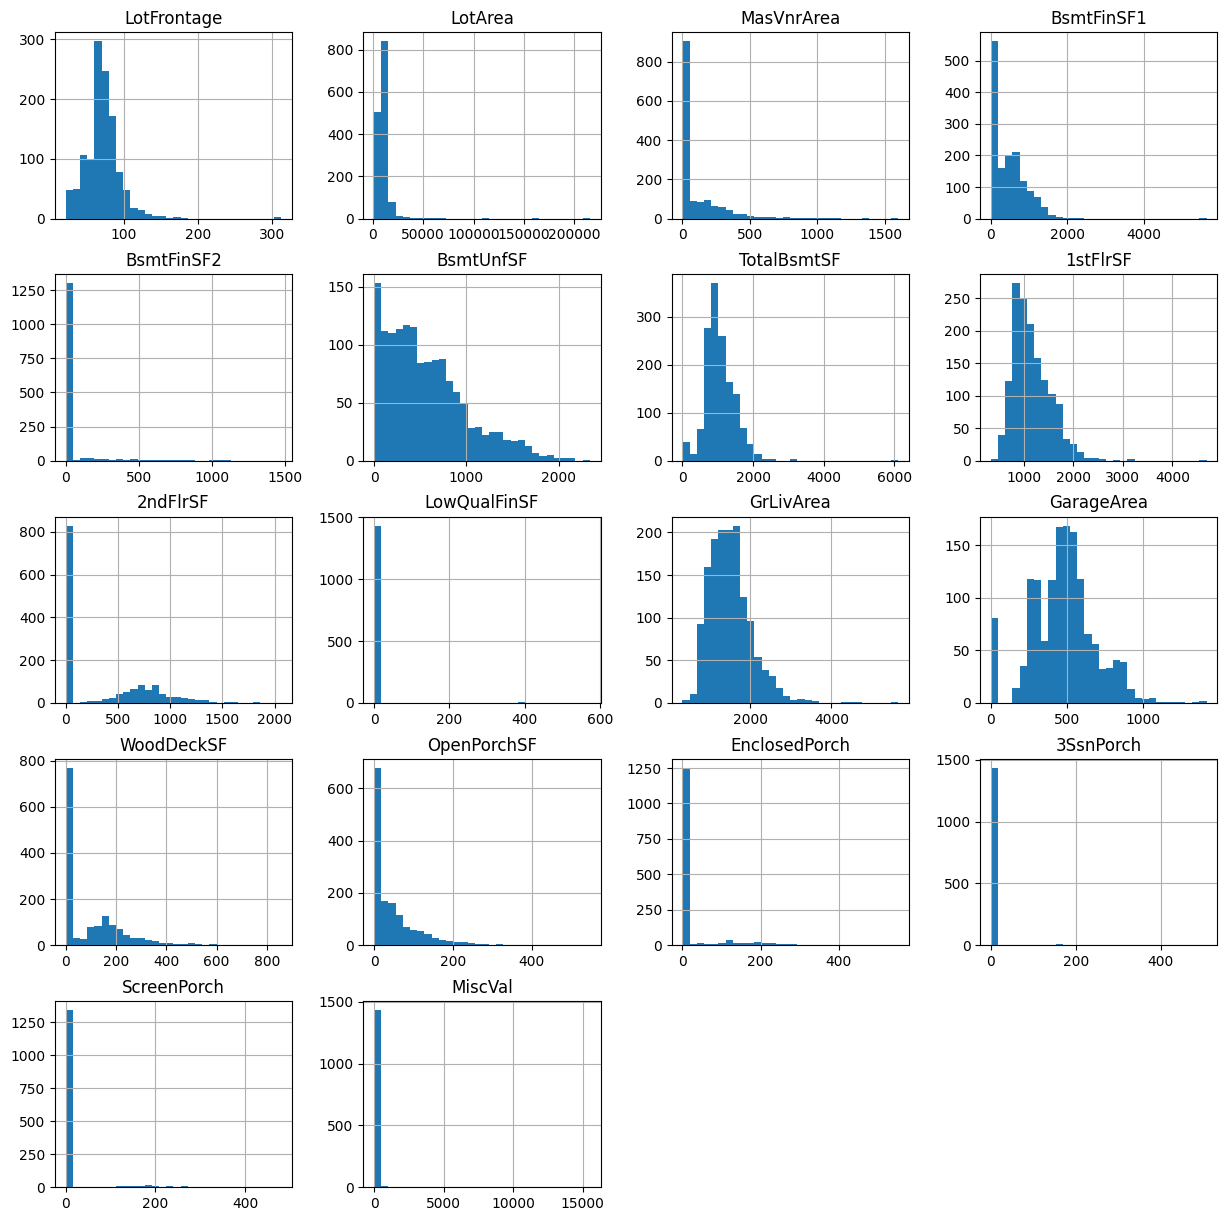

In [198]:
data[continuous_variables].hist(bins=30,figsize=(15,15))

In [212]:
skewed_continuous_variable= ['BsmtFinSF2','LowQualFinSF','EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal']

In [214]:
cont_variable= [var for var in continuous_variables if var not in skewed_continuous_variable]
cont_variable

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF']

Transforming the above data using yeojohnson

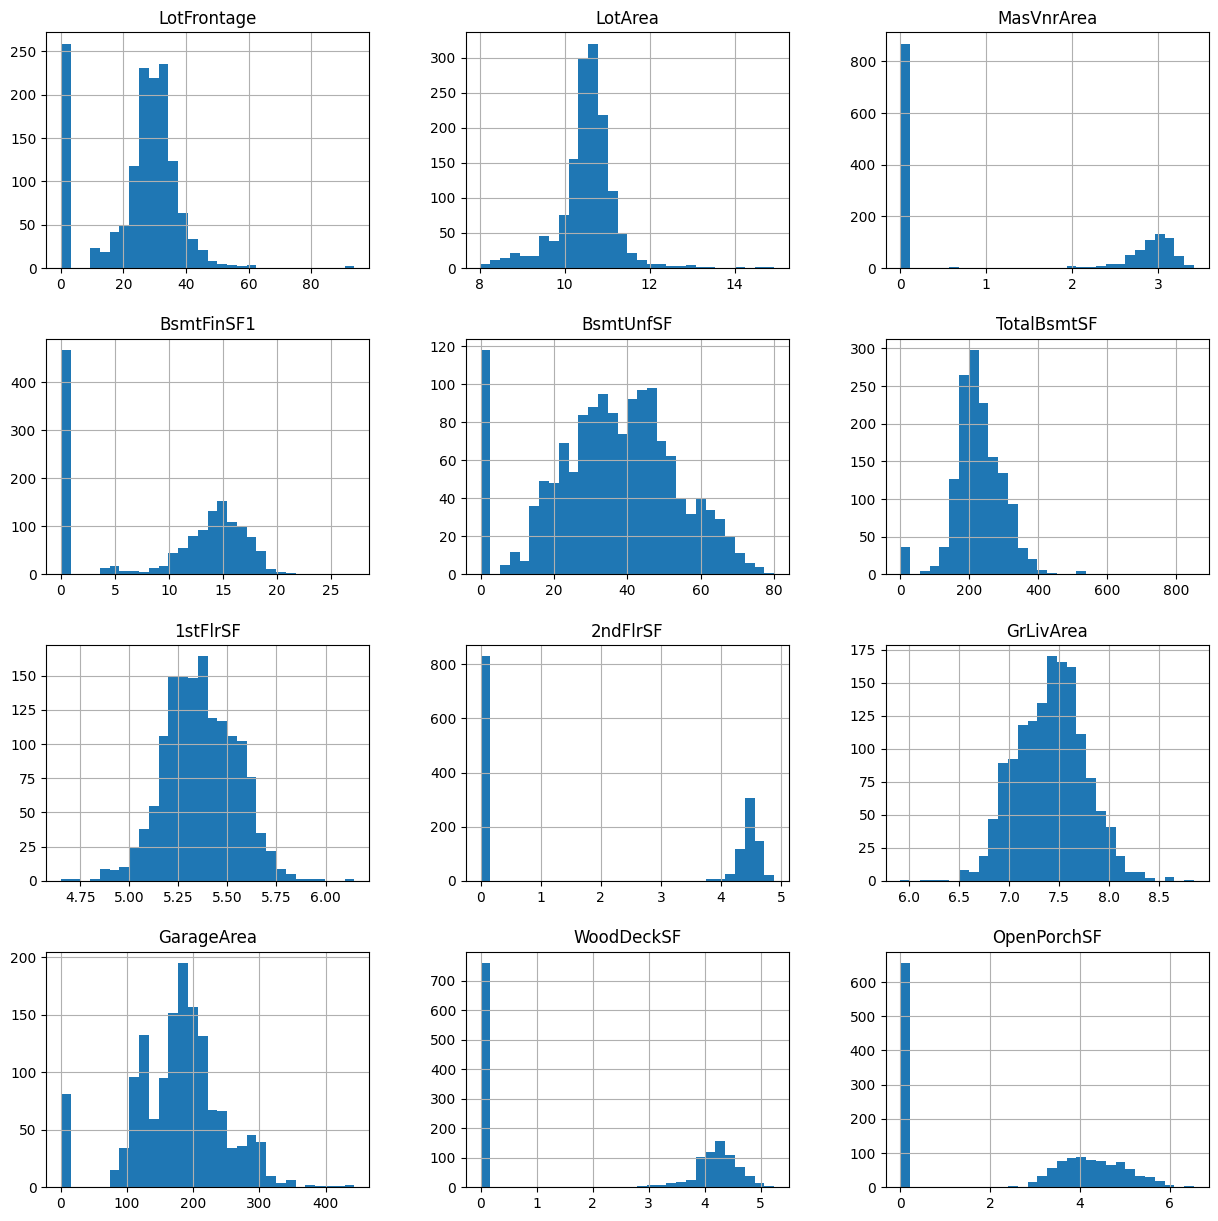

In [226]:
tmp_data= data.copy()

for var in cont_variable:
    tmp_data.fillna({var:0}, inplace=True) #yeo johnson is not applicable on null values, hence need to impute 0
    tmp_data[var ], param = stats.yeojohnson(tmp_data[var])

tmp_data[cont_variable].hist(bins=30, figsize=(15,15))
plt.show()

In [207]:
continuous_variables

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal']

Checking if tranformed values or original values has better relationship with SalePrice

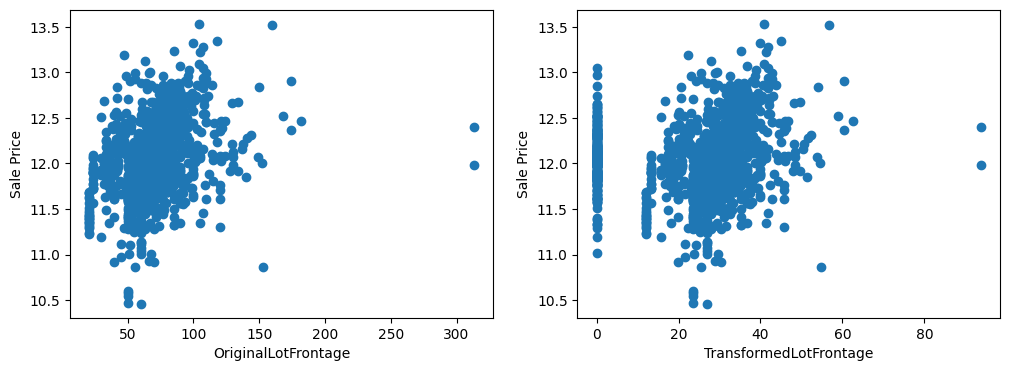

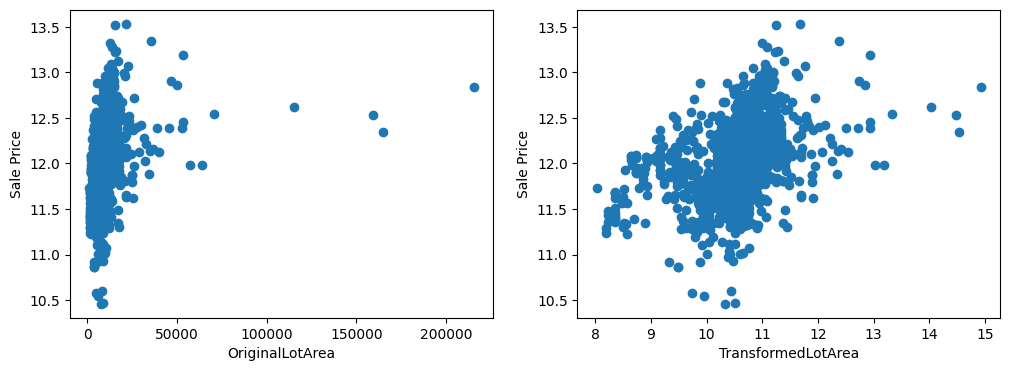

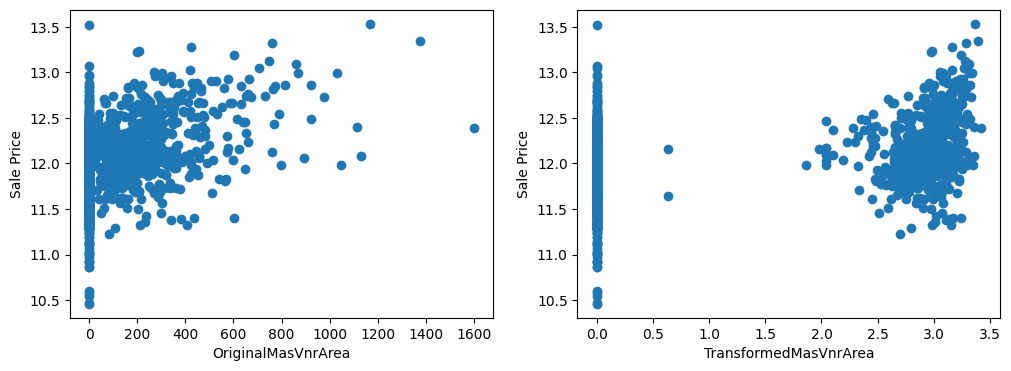

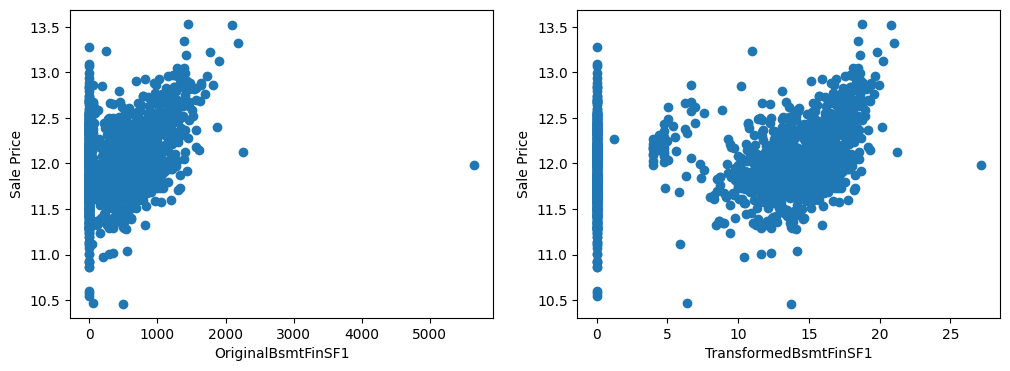

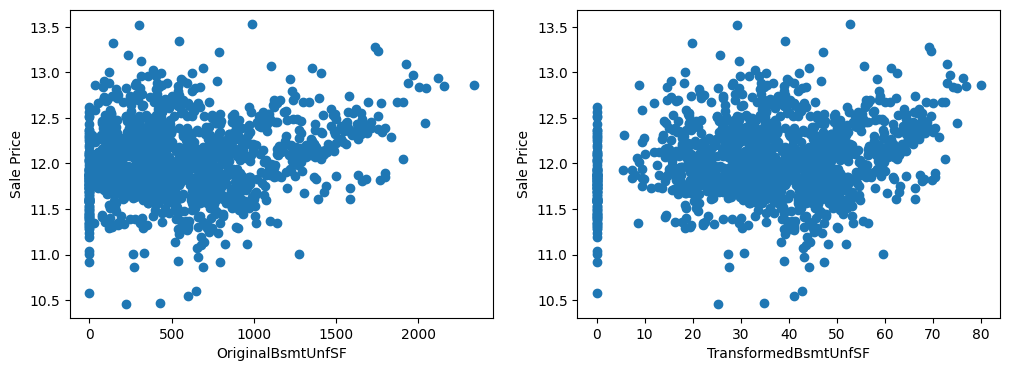

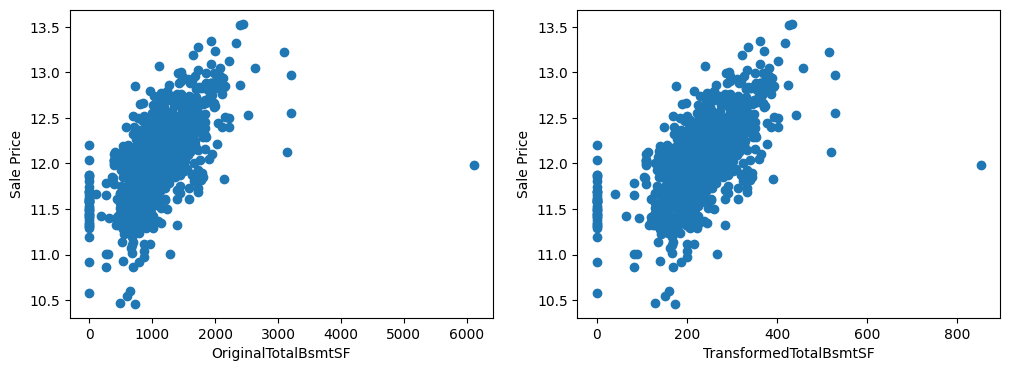

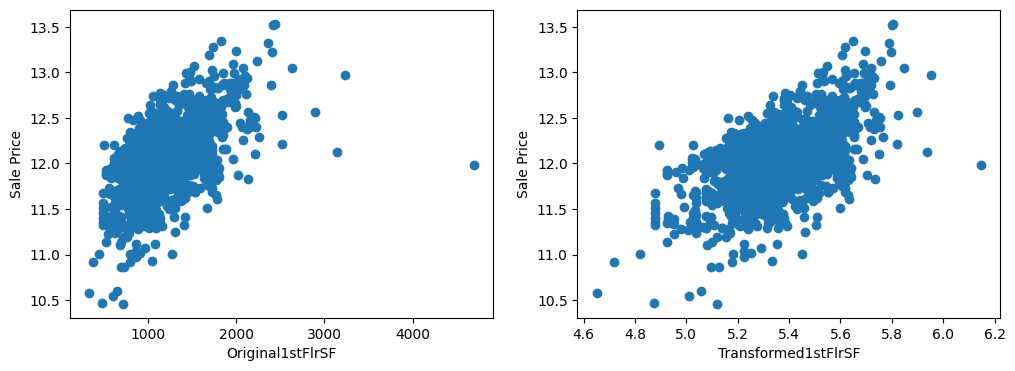

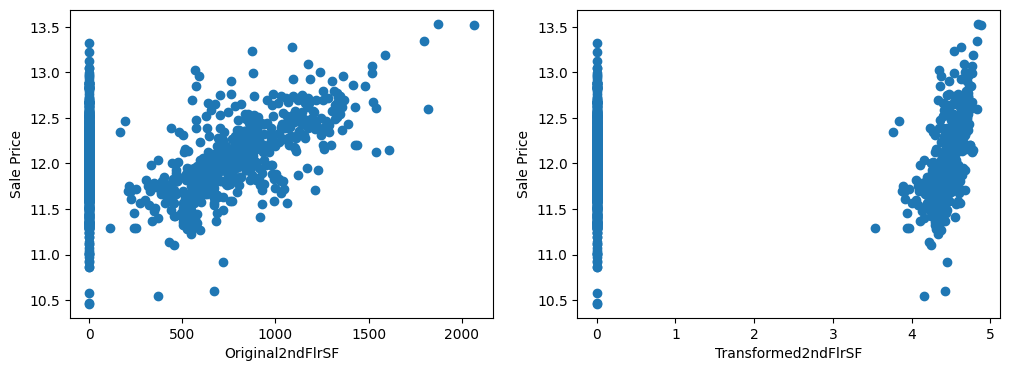

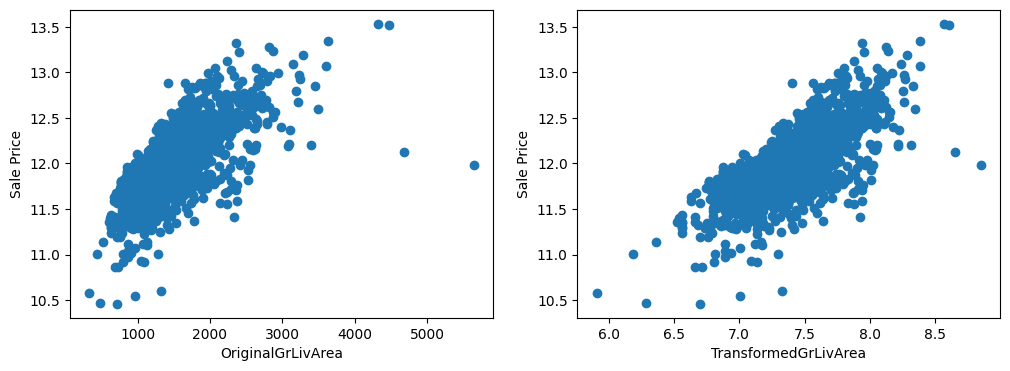

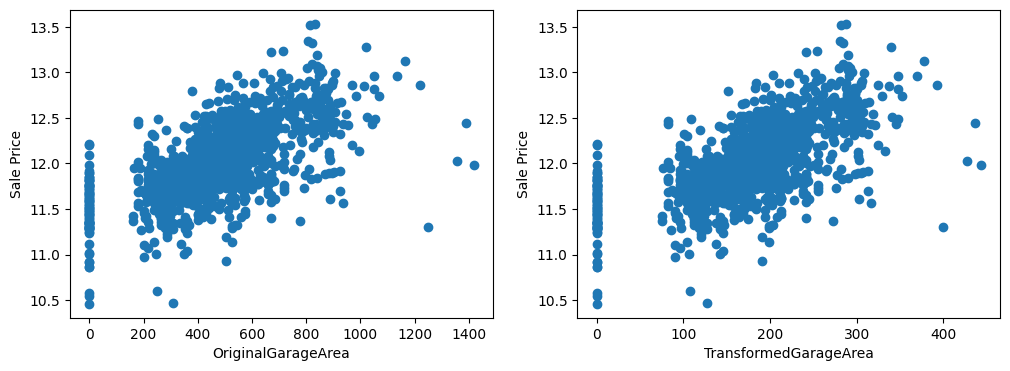

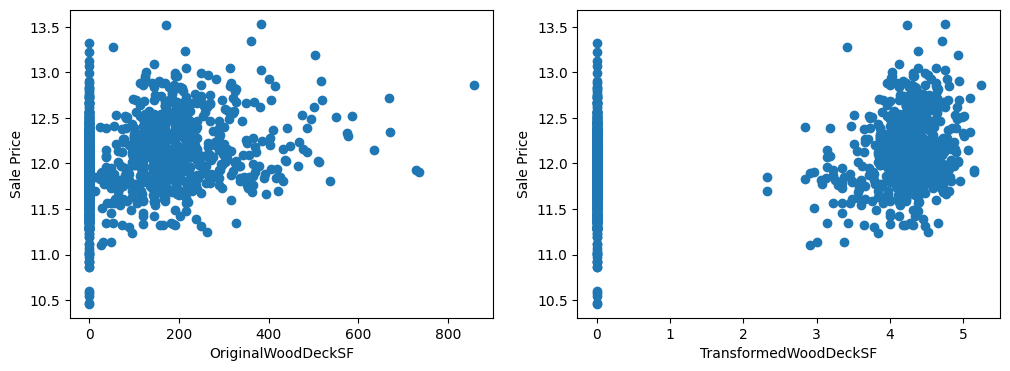

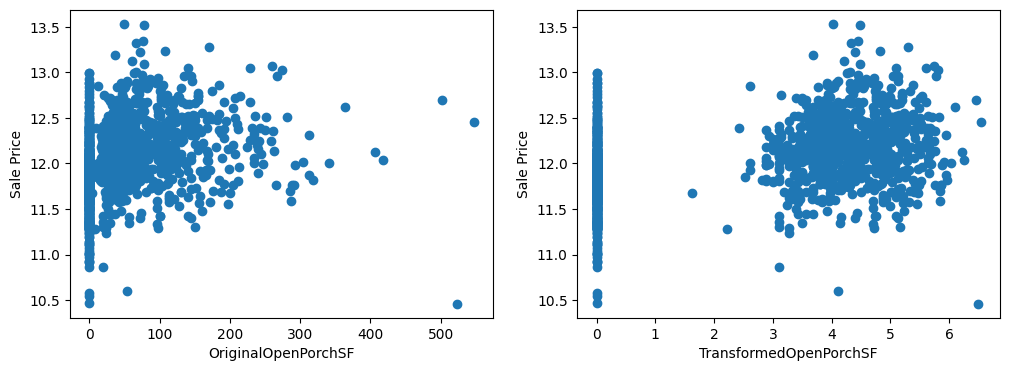

In [228]:
for var in cont_variable:

    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.scatter(data[var], np.log(data['SalePrice']))
    plt.xlabel('Original'+ var)
    plt.ylabel('Sale Price')


    plt.subplot(1,2,2)
    plt.scatter(tmp_data[var], np.log(tmp_data['SalePrice']))
    plt.xlabel('Transformed'+ var)
    plt.ylabel('Sale Price')

    plt.show()

Analysisng skewed variables

In [229]:
#changing it into 0 vs non zero values and then checking the mean wrt to each bucket

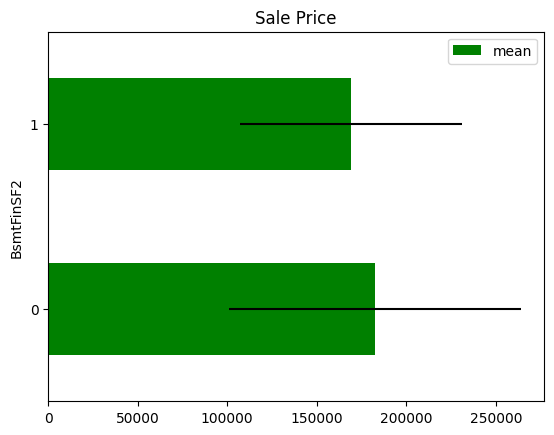

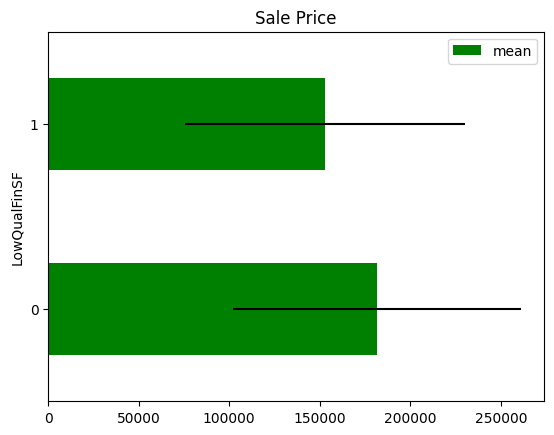

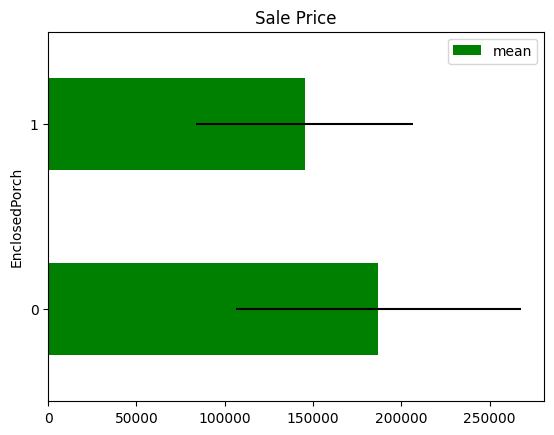

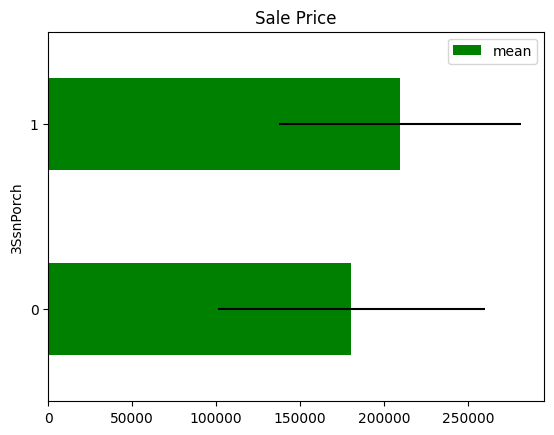

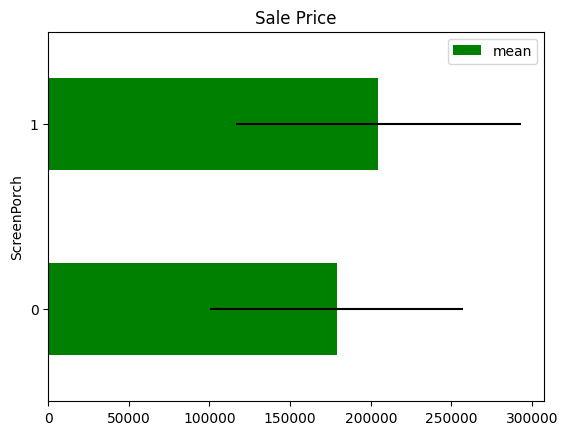

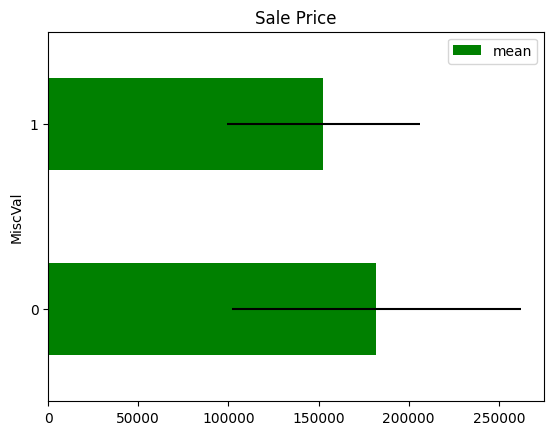

In [235]:
for var in skewed_continuous_variable:
    tmp= data.copy()

    tmp[var]= np.where(tmp[var]== 0 , 0, 1)

    tmp= tmp.groupby(var)['SalePrice'].agg(['mean','std'])

    tmp.plot(kind= 'barh', y= 'mean', xerr='std', color= 'g', title='Sale Price')

In [236]:
categorical_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'MSSubClass']

In [237]:
data[categorical_columns]

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
1455       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
0         CollgCr       Norm       Norm     1Fam     2Story     Gable   
1         Veenker      Feedr       Norm     1Fam     1Story     Gable   
2         CollgCr       Norm       Norm     1Fam     2Story     Gable   
3         Crawfor       Norm       Norm     1Fam     2Story     Gable   
4         NoRidge       Norm       Norm     1Fam     2Story     Gable   
...           ...        ...        ...      ...        ...       ...   
1455      Gilbert       Norm       Norm     1Fam     2Story     Gable   
1456       NWAmes       Norm       Norm     1Fam     1Story     Gable   
1457      Crawfor       Norm       Norm     1Fam     2Story     Gable   
1458        NAmes       Norm       Norm     1Fam     1Story       Hip   
1459      Edwards       Norm       Norm     1Fam     1Story     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
0     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
1     CompShg     MetalSd     MetalSd        NaN        TA        TA   
2     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
3     CompShg     Wd Sdng     Wd Shng        NaN        TA        TA   
4     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
...       ...         ...         ...        ...       ...       ...   
1455  CompShg     VinylSd     VinylSd        NaN        TA        TA   
1456  CompShg     Plywood     Plywood      Stone        TA        TA   
1457  CompShg     CemntBd     CmentBd        NaN        Ex        Gd   
1458  CompShg     MetalSd     MetalSd        NaN        TA        TA   
1459  CompShg     HdBoard     HdBoard        NaN        Gd        TA   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
0         PConc       Gd       TA           No          GLQ          Unf   
1        CBlock       Gd       TA           Gd          ALQ          Unf   
2         PConc       Gd       TA           Mn          GLQ          Unf   
3        BrkTil       TA       Gd           No          ALQ          Unf   
4         PConc       Gd       TA           Av          GLQ          Unf   
...         ...      ...      ...          ...          ...          ...   
1455      PConc       Gd       TA           No          Unf          Unf   
1456     CBlock       Gd       TA           No          ALQ          Rec   
1457      Stone       TA       Gd           No          GLQ          Unf   
1458     CBlock       TA       TA           Mn          GLQ          Rec   
1459     CBlock       TA       TA           No          BLQ          LwQ   

     Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
0       GasA        Ex          Y      SBrkr          Gd        Typ   
1       GasA        Ex          Y      SBrkr          TA        Typ   
2       GasA        Ex          Y      SBrkr          Gd        Typ   
3       GasA        Gd          Y      SBrkr          Gd        Typ   
4       GasA        Ex

In [248]:
data['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [242]:
data['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

<Axes: >

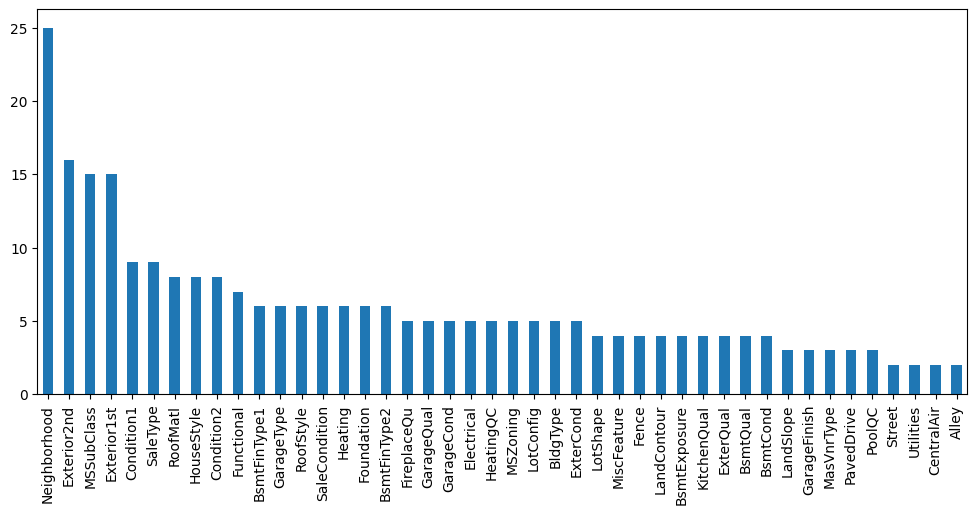

In [247]:
#nunique gives the number of unique values
#unique gives the actual unique values

data[categorical_columns].nunique().sort_values(ascending= False).plot.bar(figsize=(12,5))

Handleable cardinality

In [253]:
mapping= {'TA':3, 'Gd':4, 'Na':0, 'Fa':3, 'Po':1, 'Ex':5, 'Missing':0}

qual_vars= ['ExterQual','ExterCond','BsmtQual','BsmtCond', 'HeatingQC', 'KitchenQual',
            'FireplaceQu','GarageQual', 'GarageCond']

data[qual_vars] = data[qual_vars].apply(lambda col:col.map(mapping),)

In [250]:
data[categorical_columns].apply(lambda col: col.unique())

MSZoning                                 [RL, RM, C (all), FV, RH]
Street                                                [Pave, Grvl]
Alley                                            [nan, Grvl, Pave]
LotShape                                      [Reg, IR1, IR2, IR3]
LandContour                                   [Lvl, Bnk, Low, HLS]
Utilities                                         [AllPub, NoSeWa]
LotConfig                      [Inside, FR2, Corner, CulDSac, FR3]
LandSlope                                          [Gtl, Mod, Sev]
Neighborhood     [CollgCr, Veenker, Crawfor, NoRidge, Mitchel, ...
Condition1       [Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn, ...
Condition2       [Norm, Artery, RRNn, Feedr, PosN, PosA, RRAn, ...
BldgType                     [1Fam, 2fmCon, Duplex, TwnhsE, Twnhs]
HouseStyle       [2Story, 1Story, 1.5Fin, 1.5Unf, SFoyer, SLvl,...
RoofStyle               [Gable, Hip, Gambrel, Mansard, Flat, Shed]
RoofMatl         [CompShg, WdShngl, Metal, WdShake, Membran, T

In [257]:
exposure_mappings = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4, 'Missing': 0, 'NA': 0}

var = 'BsmtExposure'

data[var] = data[var].map(exposure_mappings)

In [254]:

finish_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

finish_vars = ['BsmtFinType1', 'BsmtFinType2']

data[finish_vars] = data[finish_vars].apply(lambda col: col.map(finish_mappings))

In [255]:
garage_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

var = 'GarageFinish'

data[var] = data[var].map(garage_mappings)

In [256]:
fence_mappings = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

var = 'Fence'

data[var] = data[var].map(fence_mappings)

In [258]:
qual_vars  = qual_vars + finish_vars + ['BsmtExposure','GarageFinish','Fence']

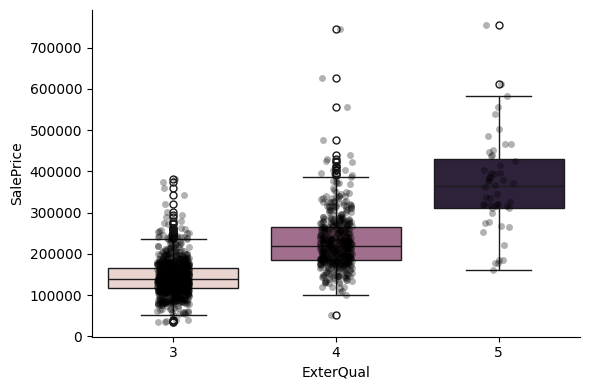

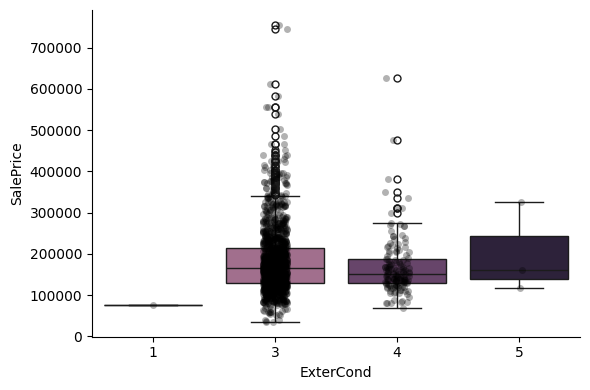

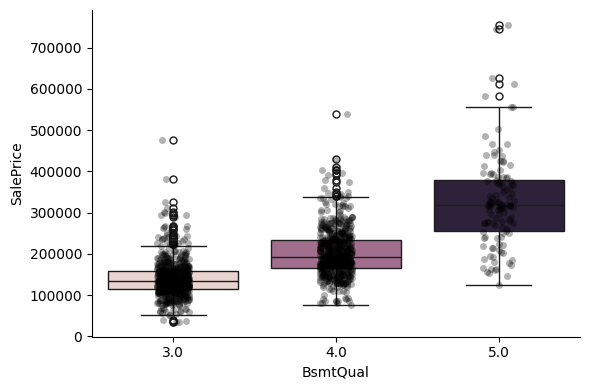

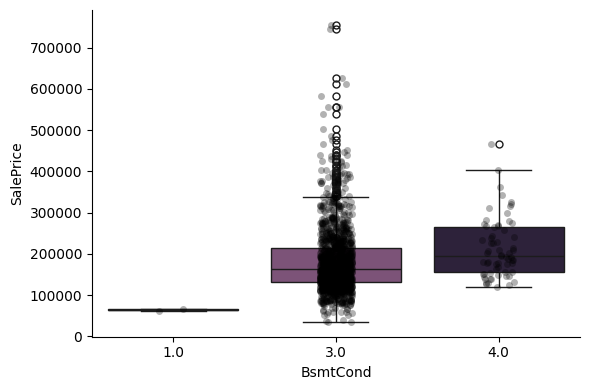

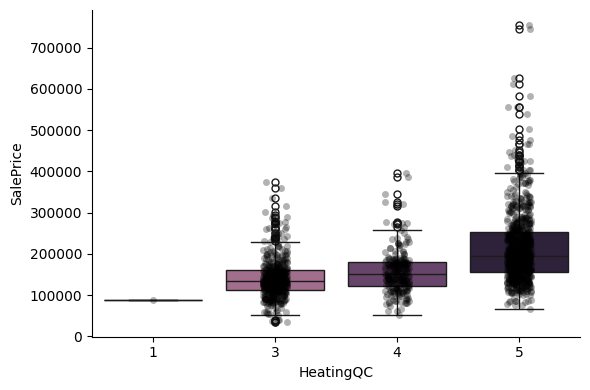

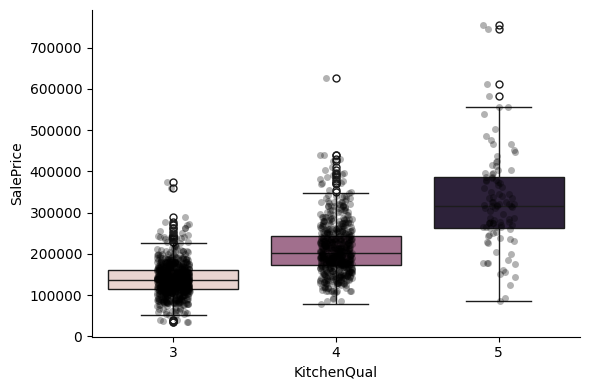

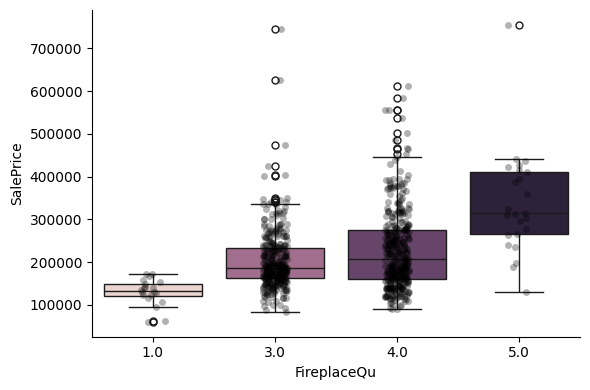

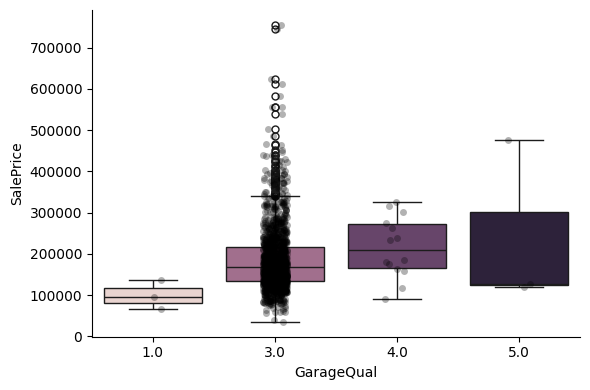

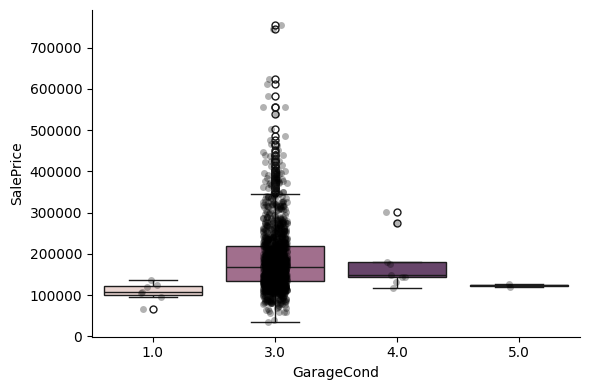

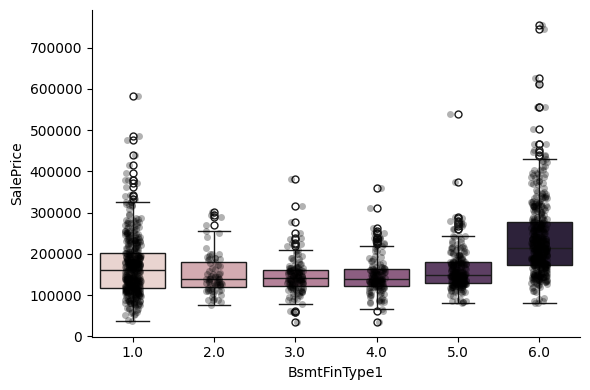

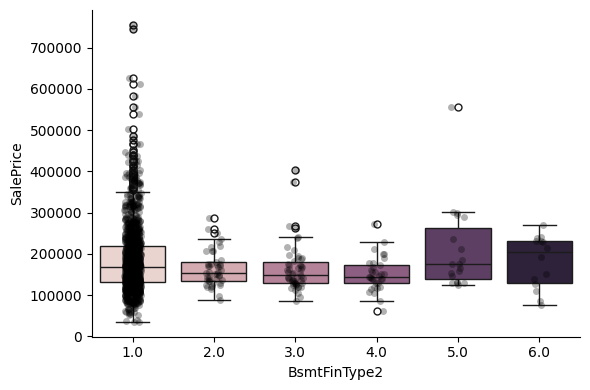

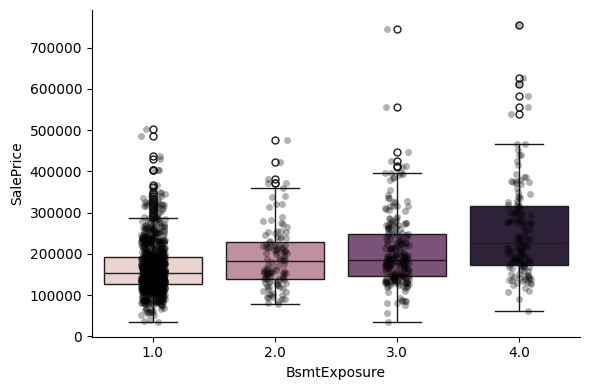

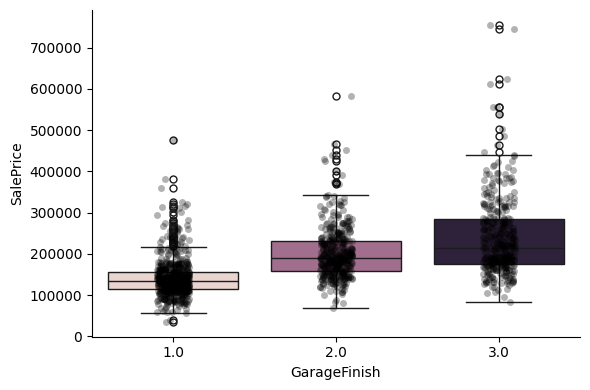

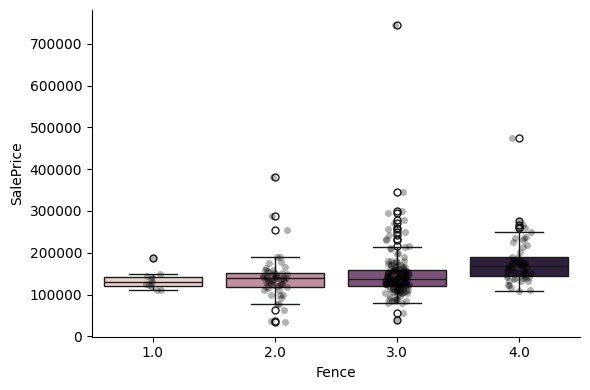

In [271]:
for var in qual_vars:
    sns.catplot(data=data, x= var,y='SalePrice', hue=var, kind= 'box', legend=False, height=4, aspect=1.5)
    sns.stripplot(x=data[var], y= data['SalePrice'], jitter=.1, alpha= 0.3, color='k')
    plt.show()

In [284]:
cat_others = [var for var in categorical_columns if var not in qual_vars]
cat_others

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageType',
 'PavedDrive',
 'PoolQC',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'MSSubClass']

In [285]:
len(cat_others)

30

Lets check whether in other categorical variables there are some categories that are very few in number

In [297]:
for var in cat_others:
    print(100.0*data[var].value_counts()/len(data[var]))

MSZoning
RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: count, dtype: float64
Street
Pave    99.589041
Grvl     0.410959
Name: count, dtype: float64
Alley
Grvl    3.424658
Pave    2.808219
Name: count, dtype: float64
LotShape
Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: count, dtype: float64
LandContour
Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: count, dtype: float64
Utilities
AllPub    99.931507
NoSeWa     0.068493
Name: count, dtype: float64
LotConfig
Inside     72.054795
Corner     18.013699
CulDSac     6.438356
FR2         3.219178
FR3         0.273973
Name: count, dtype: float64
LandSlope
Gtl    94.657534
Mod     4.452055
Sev     0.890411
Name: count, dtype: float64
Neighborhood
NAmes      15.410959
CollgCr    10.273973
OldTown     7.739726
Edwards     6.849315
Somerst     5.890411
Gilbert     5.410959
NridgHt     5.273973
Sawyer      5.068493
NWAmes      5.0

creating a function

In [346]:
def get_rare_labels( var, threshold):

    tmp= 1.0*var.value_counts()/len(var)
    threshold = float(threshold)  # Convert threshold to float
    return print(tmp[tmp< threshold])

threshold_value = 0.01
data[cat_others].apply(get_rare_labels, threshold=threshold_value)
# data[cat_others].apply(lambda col: get_rare_labels(col, threshold=threshold_value))

#the above function is does not perform any operation, hence apply function is not working as expected

MSZoning
C (all)    0.006849
Name: count, dtype: float64
Street
Grvl    0.00411
Name: count, dtype: float64
Series([], Name: count, dtype: float64)
LotShape
IR3    0.006849
Name: count, dtype: float64
Series([], Name: count, dtype: float64)
Utilities
NoSeWa    0.000685
Name: count, dtype: float64
LotConfig
FR3    0.00274
Name: count, dtype: float64
LandSlope
Sev    0.008904
Name: count, dtype: float64
Neighborhood
Veenker    0.007534
NPkVill    0.006164
Blueste    0.001370
Name: count, dtype: float64
Condition1
RRAe    0.007534
PosA    0.005479
RRNn    0.003425
RRNe    0.001370
Name: count, dtype: float64
Condition2
Feedr     0.004110
Artery    0.001370
RRNn      0.001370
PosN      0.001370
PosA      0.000685
RRAn      0.000685
RRAe      0.000685
Name: count, dtype: float64
Series([], Name: count, dtype: float64)
HouseStyle
1.5Unf    0.009589
2.5Unf    0.007534
2.5Fin    0.005479
Name: count, dtype: float64
RoofStyle
Flat       0.008904
Gambrel    0.007534
Mansard    0.004795
Shed     

MSZoning         None
Street           None
Alley            None
LotShape         None
LandContour      None
Utilities        None
LotConfig        None
LandSlope        None
Neighborhood     None
Condition1       None
Condition2       None
BldgType         None
HouseStyle       None
RoofStyle        None
RoofMatl         None
Exterior1st      None
Exterior2nd      None
MasVnrType       None
Foundation       None
Heating          None
CentralAir       None
Electrical       None
Functional       None
GarageType       None
PavedDrive       None
PoolQC           None
MiscFeature      None
SaleType         None
SaleCondition    None
MSSubClass       None
dtype: object

In [355]:
def get_rare_labels(df, var, threshold):
    df= df.copy()
    tmp = 1.0 * df[var].value_counts() / len(df[var])
    threshold = float(threshold)  # Convert threshold to float
    return tmp[tmp < threshold]

for var in cat_others:
    print(get_rare_labels(data, var, .01))

MSZoning
C (all)    0.006849
Name: count, dtype: float64
Street
Grvl    0.00411
Name: count, dtype: float64
Series([], Name: count, dtype: float64)
LotShape
IR3    0.006849
Name: count, dtype: float64
Series([], Name: count, dtype: float64)
Utilities
NoSeWa    0.000685
Name: count, dtype: float64
LotConfig
FR3    0.00274
Name: count, dtype: float64
LandSlope
Sev    0.008904
Name: count, dtype: float64
Neighborhood
Veenker    0.007534
NPkVill    0.006164
Blueste    0.001370
Name: count, dtype: float64
Condition1
RRAe    0.007534
PosA    0.005479
RRNn    0.003425
RRNe    0.001370
Name: count, dtype: float64
Condition2
Feedr     0.004110
Artery    0.001370
RRNn      0.001370
PosN      0.001370
PosA      0.000685
RRAn      0.000685
RRAe      0.000685
Name: count, dtype: float64
Series([], Name: count, dtype: float64)
HouseStyle
1.5Unf    0.009589
2.5Unf    0.007534
2.5Fin    0.005479
Name: count, dtype: float64
RoofStyle
Flat       0.008904
Gambrel    0.007534
Mansard    0.004795
Shed     

In [314]:
#Alternate way
data[cat_others].apply(lambda col: col.unique())

MSZoning                                 [RL, RM, C (all), FV, RH]
Street                                                [Pave, Grvl]
Alley                                            [nan, Grvl, Pave]
LotShape                                      [Reg, IR1, IR2, IR3]
LandContour                                   [Lvl, Bnk, Low, HLS]
Utilities                                         [AllPub, NoSeWa]
LotConfig                      [Inside, FR2, Corner, CulDSac, FR3]
LandSlope                                          [Gtl, Mod, Sev]
Neighborhood     [CollgCr, Veenker, Crawfor, NoRidge, Mitchel, ...
Condition1       [Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn, ...
Condition2       [Norm, Artery, RRNn, Feedr, PosN, PosA, RRAn, ...
BldgType                     [1Fam, 2fmCon, Duplex, TwnhsE, Twnhs]
HouseStyle       [2Story, 1Story, 1.5Fin, 1.5Unf, SFoyer, SLvl,...
RoofStyle               [Gable, Hip, Gambrel, Mansard, Flat, Shed]
RoofMatl         [CompShg, WdShngl, Metal, WdShake, Membran, T

In [290]:
# data[cat_others].apply(lambda col: col.value_counts())

In [ ]:
# The rare labels cause over- fitting of machine learning models. We will remove them.

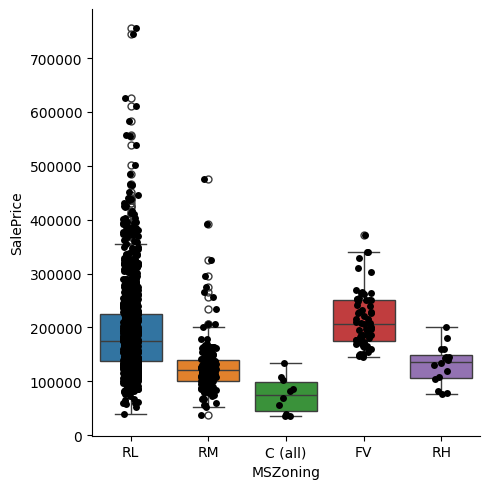

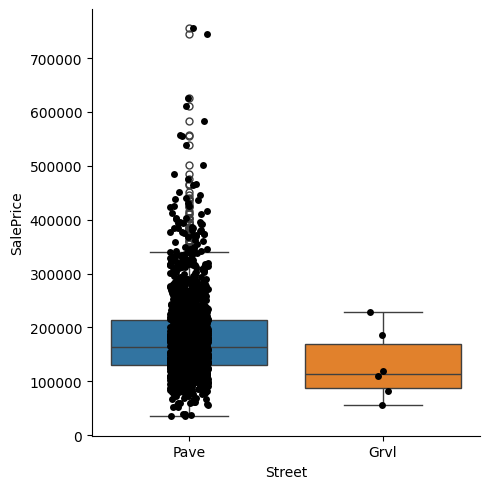

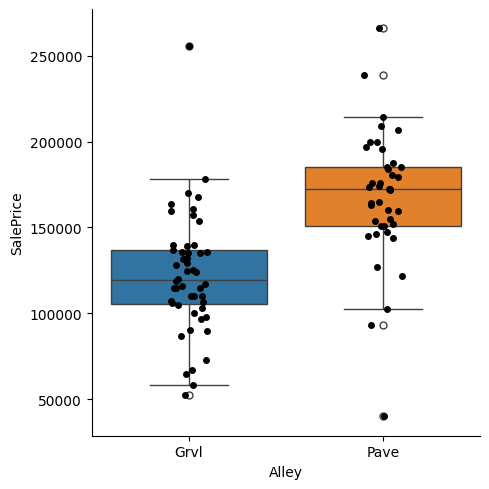

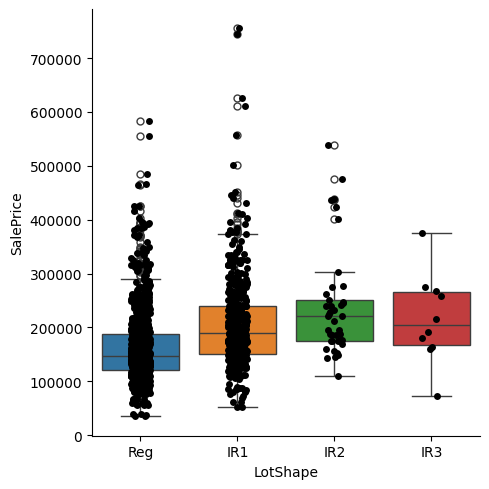

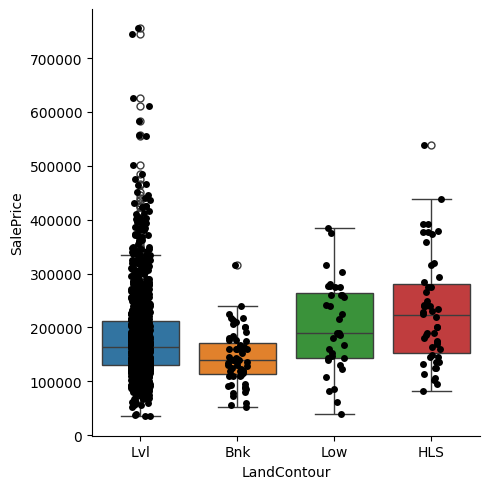

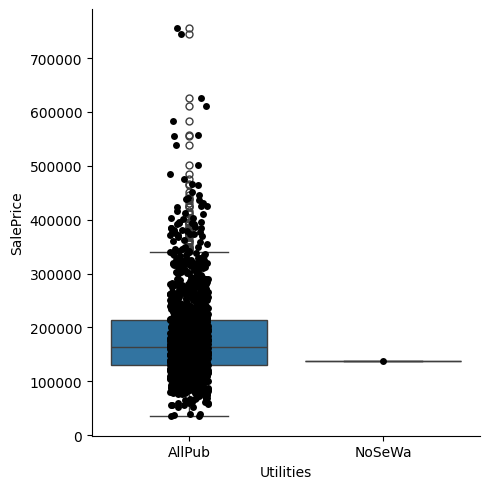

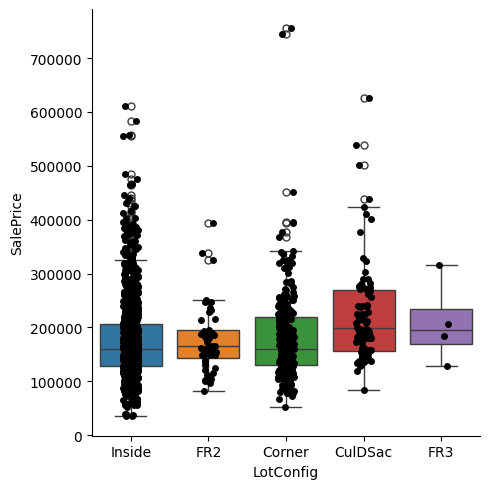

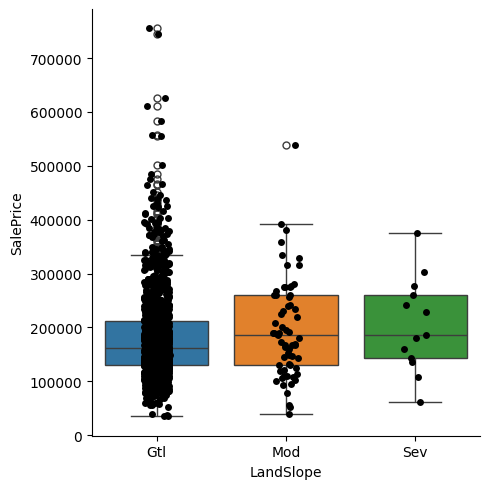

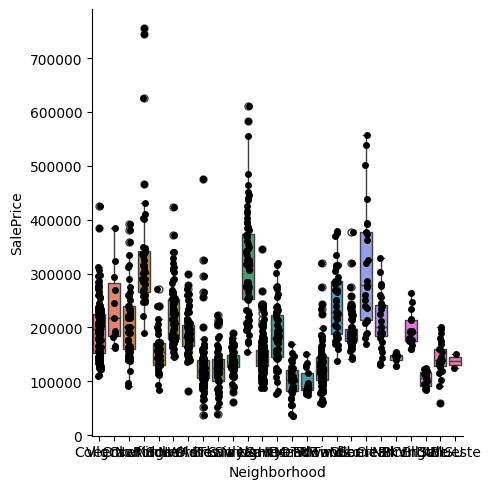

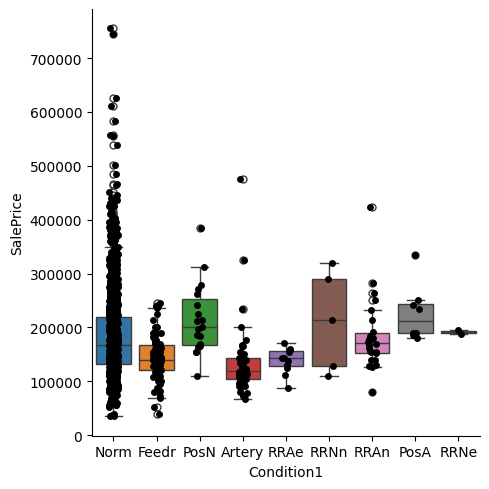

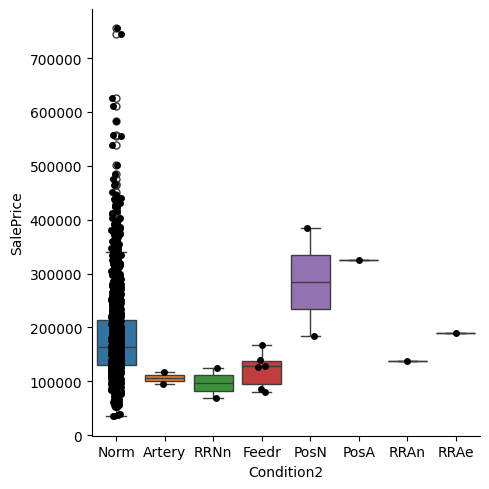

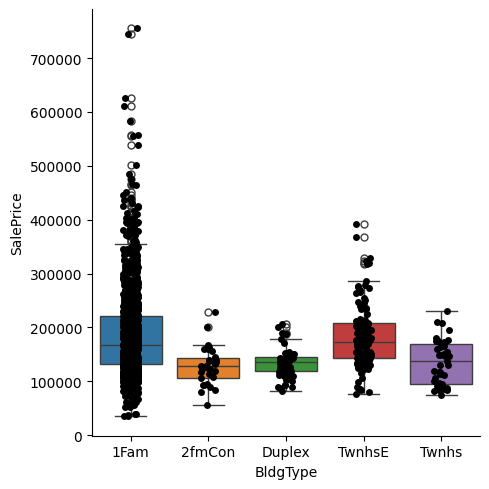

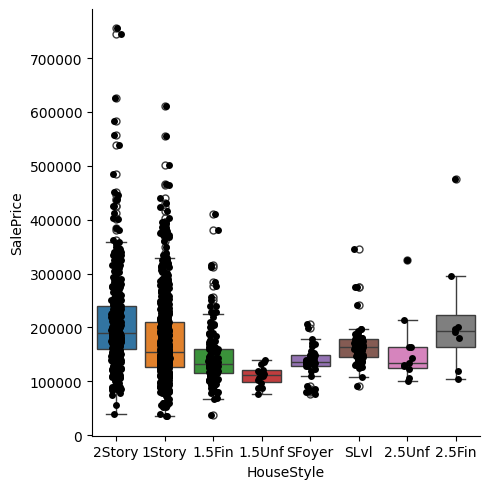

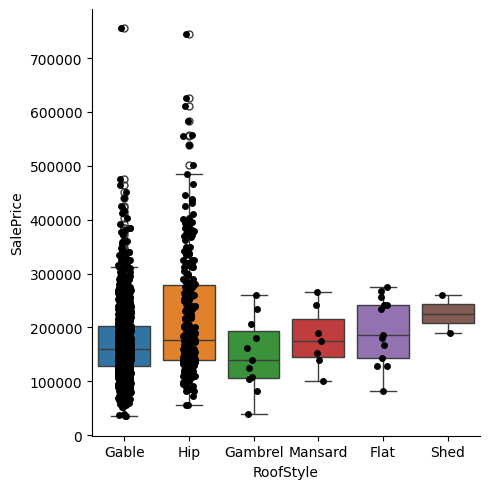

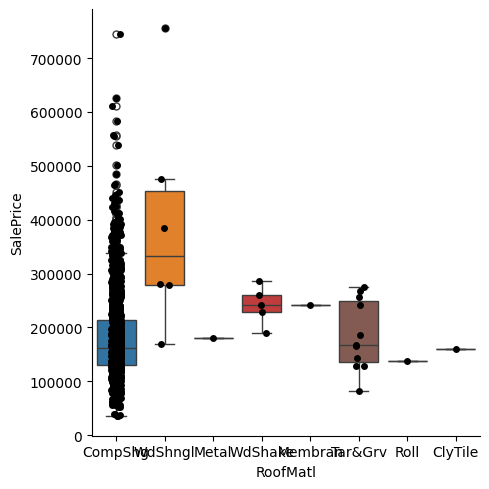

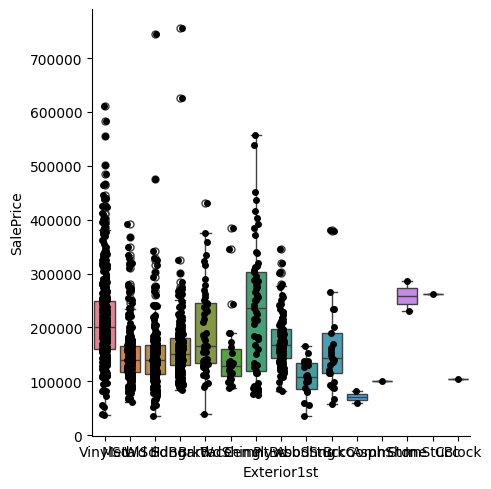

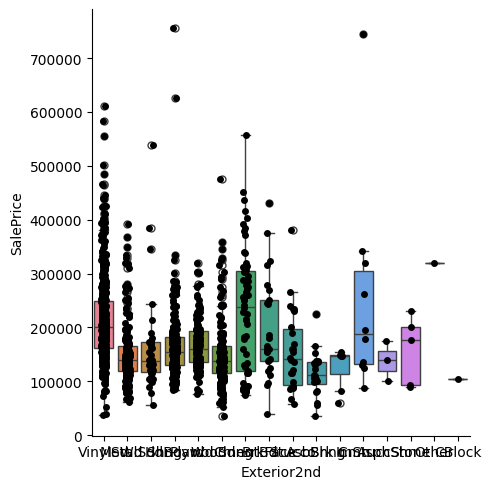

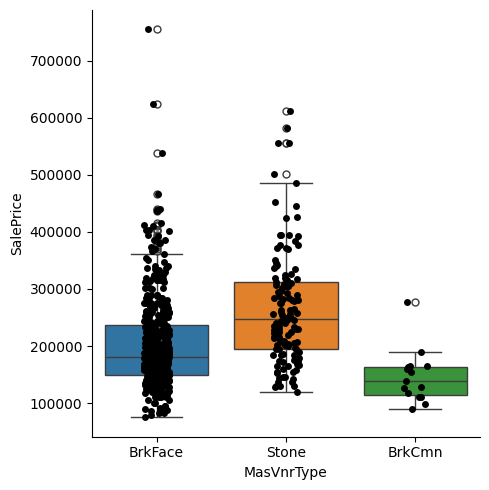

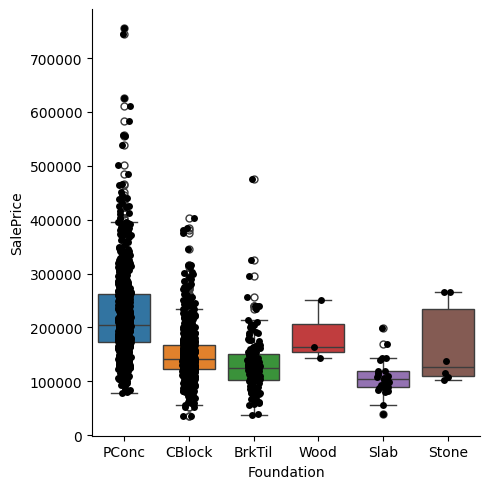

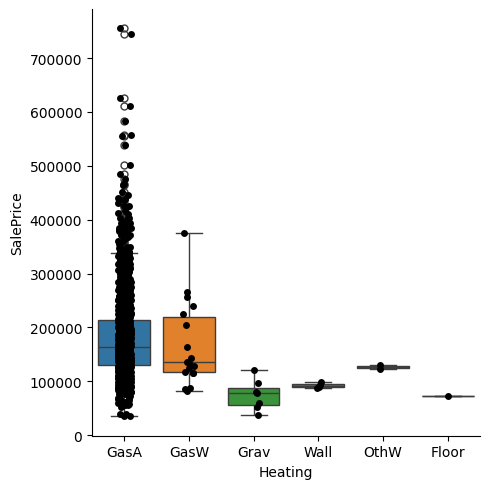

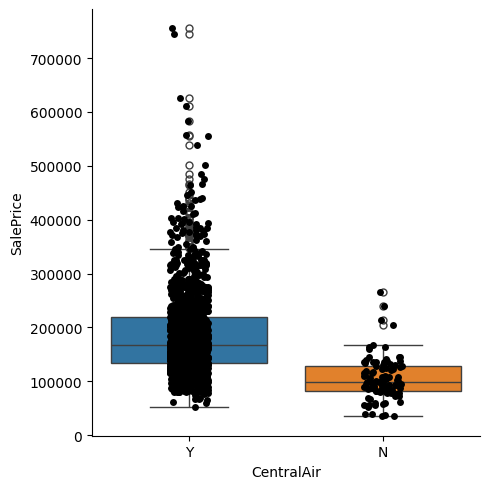

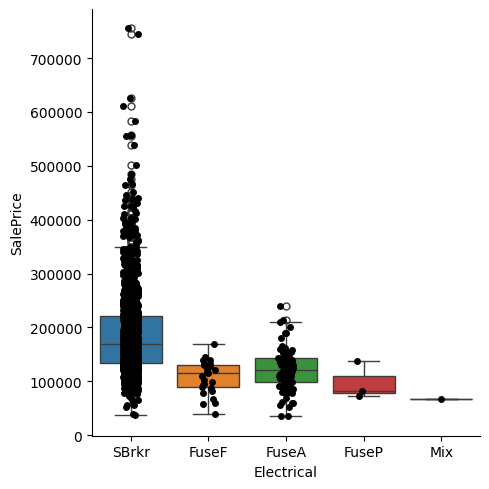

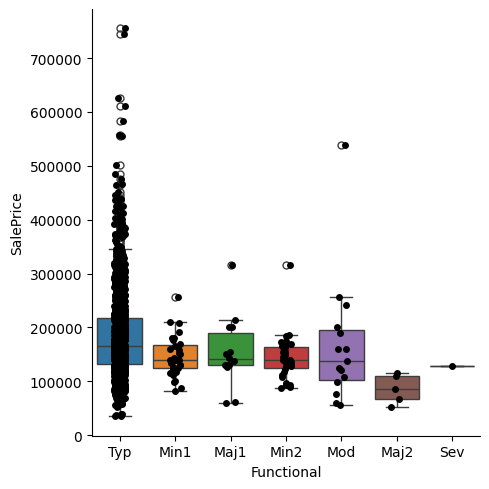

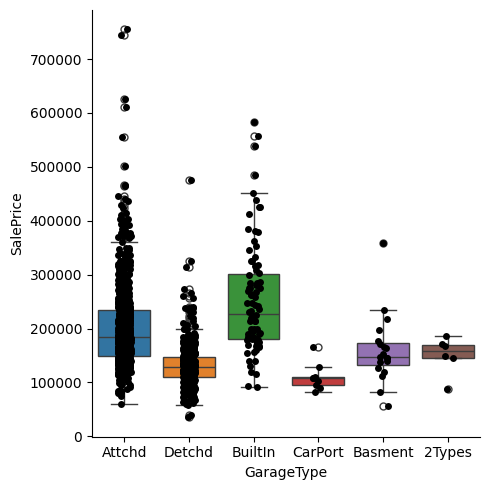

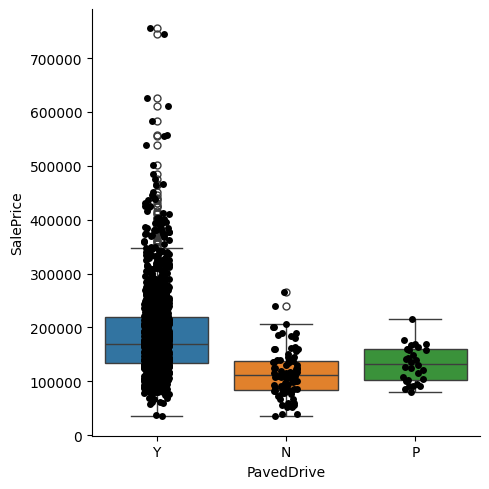

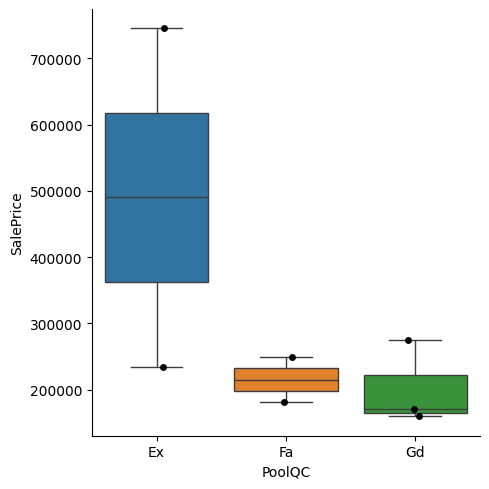

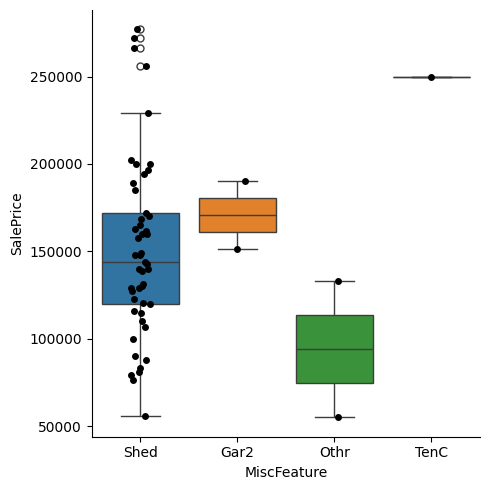

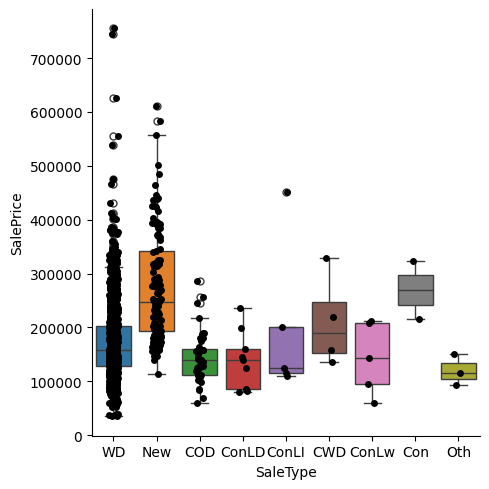

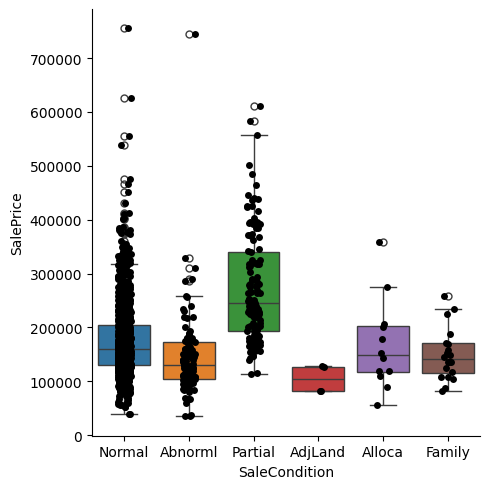

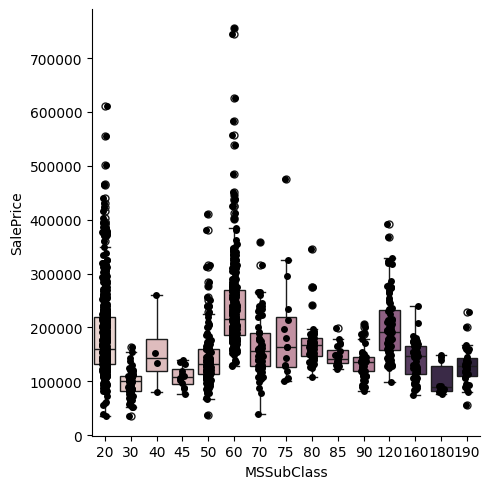

In [363]:
for var in cat_others:
    sns.catplot(x= var, y= 'SalePrice', data=data, kind= 'box',hue= var,legend= False)
    sns.stripplot(x= var, y= 'SalePrice', data=data, c='k',  legend= False)
    plt.show()